Imports

In [1]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
modellingephemeral = '/rds/general/ephemeral/user/mo2016/ephemeral/Documents/modelling'

sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern
from numerical.countPeaksAnalysisFunctions import countPeaks, varPeakDistFunction
from numerical.generalFunctions import round_it
from numerical.fourierAnalysisFunctions import psEntropyFunction, plotFourier


from analytical.linear_stability_analysis import detailed_turing_analysis_dict
from randomfunctions import plot_all_dispersion, plot_highest_dispersion

from scipy.signal import find_peaks
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm



System definitions

In [2]:
circuit_n='turinghill'
variant= 0
n_species=2
mechanism='nogrowth'
L=50; dx =1; J = int(L/dx)
T =3000; dt = 0.05; N = int(T/dt)
boundaryCoeff=2;rate=0.01
filename= lambda mechanism, parID: 'circuit%s_variant%s_bc%s_%s_rate%s_ID%s_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundaryCoeff, mechanism,rate,parID,L,J,T,N)
n_param_sets=2000000
# lsa_df= pickle.load( open(modellingpath + '/growth/out/analytical/lsa_dataframes/lsa_df_%s_variant%r_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))
# single_lsa_df =  lsa_df.xs(0, level=1)
# parID_list = pickle.load(open( modellingpath + '/growth/out/numerical/%s/%s/data/parID_list_%s.pkl'%(circuit_n,mechanism,filename('x')), "rb" ) )
# parID_list = [int(parID) for parID in parID_list]
# instability_df= pickle.load( open(modellingpath + '/growth/out/analytical/instability/instability_df_%s_variant%r_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))
# singleSsInstability_df = instability_df.loc[instability_df['ss_n']==1]
# singleSsInstability_df
pattern_df = pickle.load(open( modellingpath + '/growth/out/patternAnalysis/%s/%s/pattern/pattern_df_%s.pkl'%(circuit_n,mechanism,filename(mechanism,'x')), 'rb'))


Functions

In [3]:
def parID_display(parIDss, L,J,T,round=False,crop=100,ss_n=0,df = pattern_df):
    #data
    U_final = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parIDss)), 'rb'))
    plot1D(U_final,round=round)

    plt.subplots(figsize=(10,4))

    #dispersion
    plt.subplot(121)
    parID_dispersion(parIDss,crop)
    #convergence
    plt.subplot(122)

    parID_surfpattern(parIDss,L,J,T)
    plt.tight_layout()
    plt.show()
def parID_surfpattern(parIDss,L,J,T,record_every_x_hours = 10):
    #data 
    U_record = pickle.load( open(modellingephemeral + '/growth/out/numerical/%s/%s/simulation/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parIDss)), 'rb'))    
    #grids
    dx = float(L)/float(J-1)
    x_grid = np.array([j*dx for j in range(J)])
    reduced_t_grid = np.arange(0,T,record_every_x_hours) 

    #plot
    surfpattern(U_record, [x_grid, reduced_t_grid], 'linear',  morphogen=1, rate=0, savefig=False,filename='',logResults=False,normalize=False)


def parID_dispersion(parIDss,crop, df = pattern_df):
    #dispersion
    parID,ss = [int(x) for x in parIDss.split('.')]

    par_dict = df.loc[(parID,ss)].to_dict() #converts a dataframe row into a dictionary outputing a dictionary for a specific parameter set
    out = detailed_turing_analysis_dict(par_dict, circuit_n, n_species)
    plot_highest_dispersion(out[-3][ss-1],crop=crop)


Value counts and df definitions

In [4]:
print('\n',pattern_df['system_class'].value_counts())
print('\n',pattern_df['pattern'].value_counts())



 simple stable           2338152
simple unstable          166960
complex unstable          95381
hopf                      61890
turing I hopf              1047
turing I oscillatory         29
no steady state              10
turing I                      2
Name: system_class, dtype: int64

 Non-Stationary heterogeneity    22951
Homogeneous                     20865
Temporal Oscillator             18969
Stationary spatial wave           183
Name: pattern, dtype: int64


## Stationary spatial wave

In [5]:
df1 = pattern_df.loc[(pattern_df['pattern']=='Stationary spatial wave') ]
print(df1['system_class'].value_counts())


hopf                    115
turing I hopf            54
turing I oscillatory     12
turing I                  2
Name: system_class, dtype: int64


hopf
1.0 0.0010542855797895797
6538.3


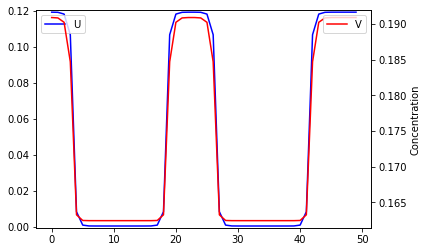

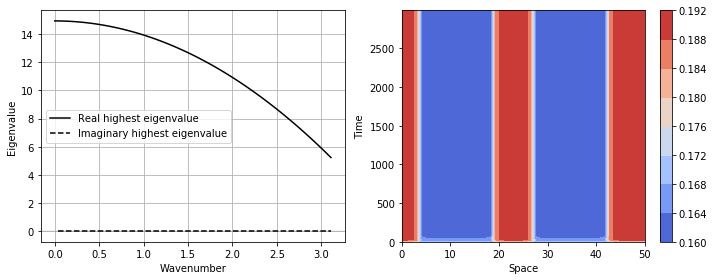

hopf
1.0 3.7171502070942273
29455.2


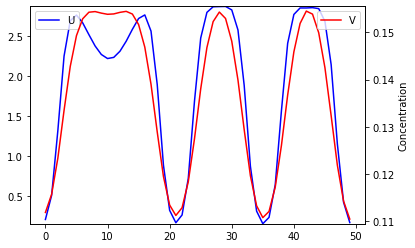

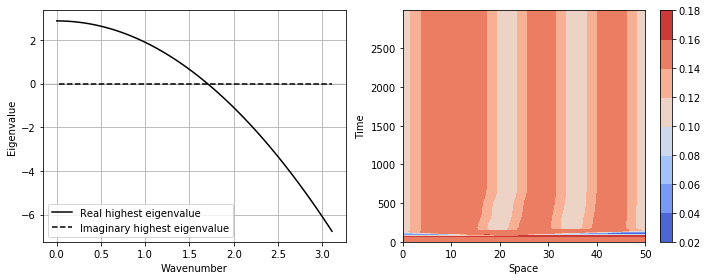

hopf
1.0 0.002971412880485329
66515.2


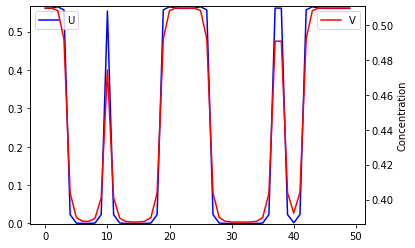

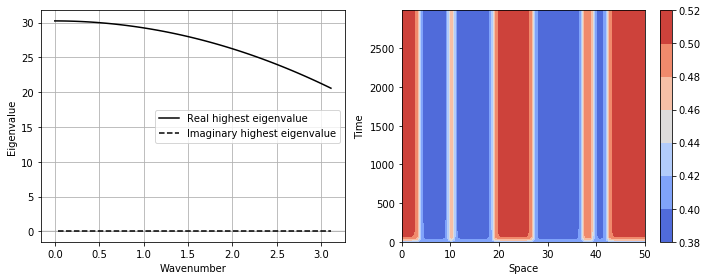

hopf
1.0 1.4981724455185104
80432.2


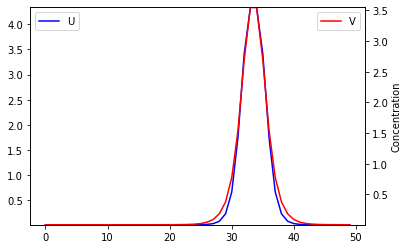

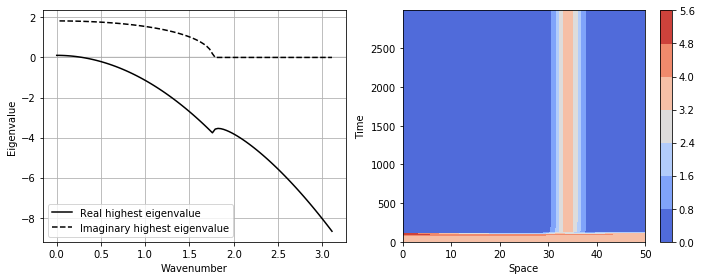

hopf
1.0 9.809856598977955
97773.0


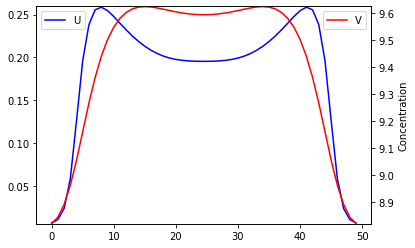

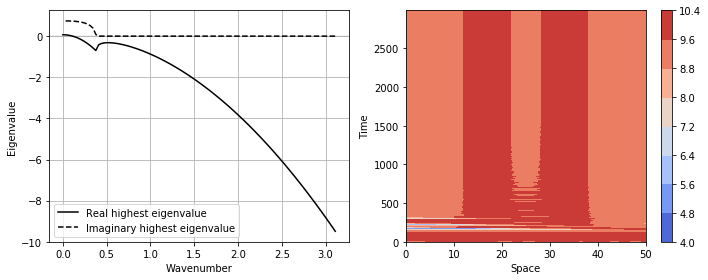

turing I hopf
1.0 6.834219392608295
99782.1


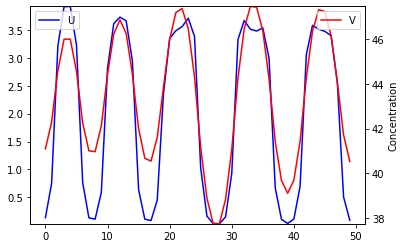

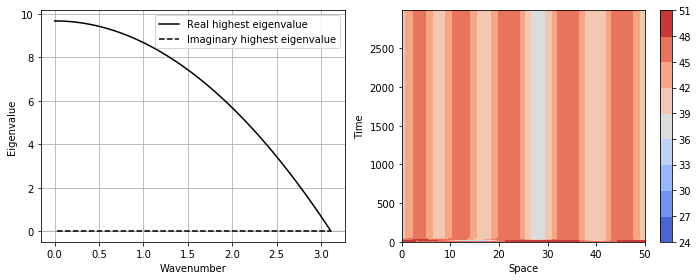

hopf
1.0 6.3245378485366786
108152.2


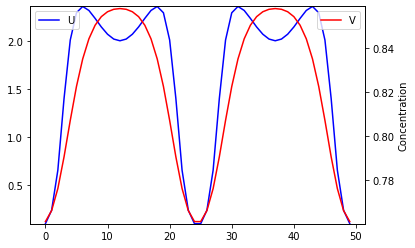

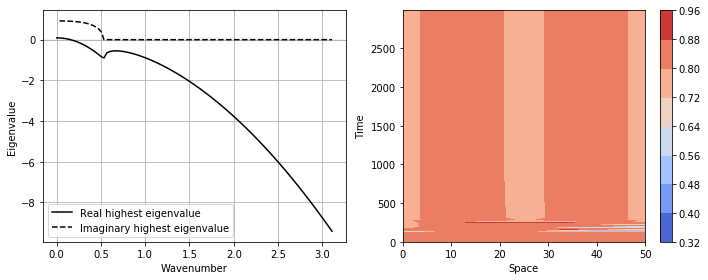

turing I oscillatory
1.0 9.871792232811737
118941.0


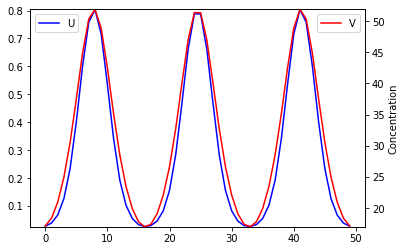

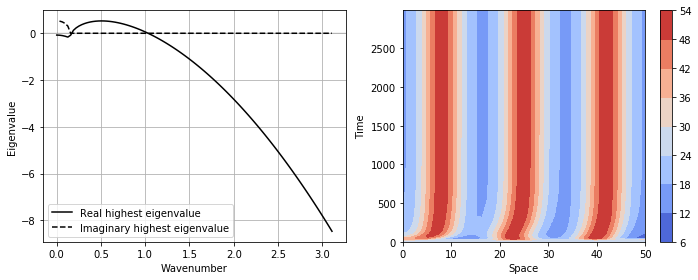

turing I hopf
1.0 9.747581275044839
119563.2


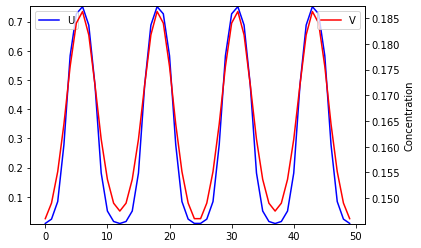

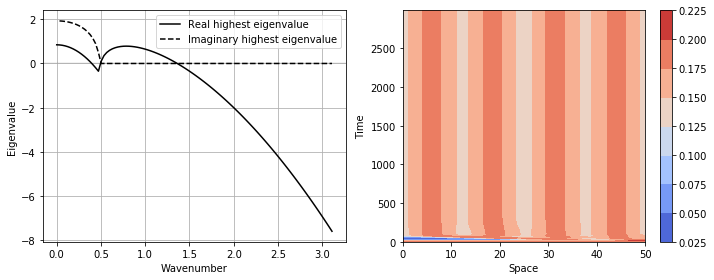

hopf
1.0 2.2597808027417563
125985.2


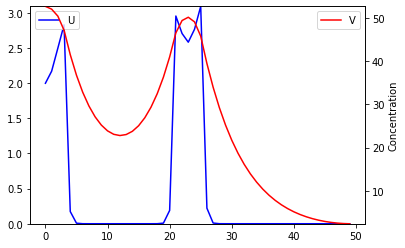

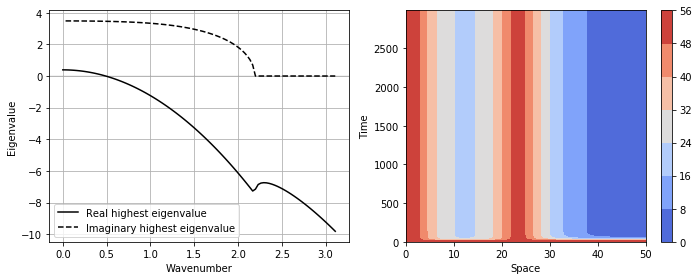

turing I hopf
1.0 7.81129778045932
134123.2


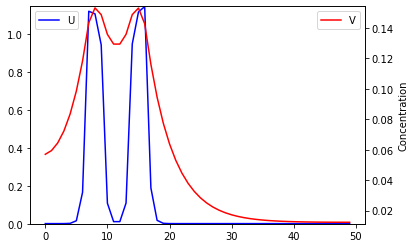

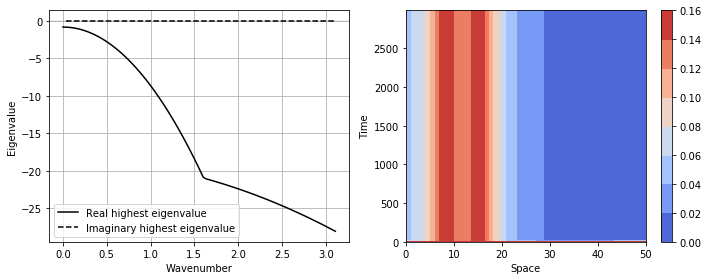

turing I oscillatory
1.0 8.272981979622703
135128.1


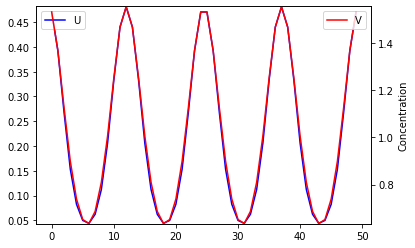

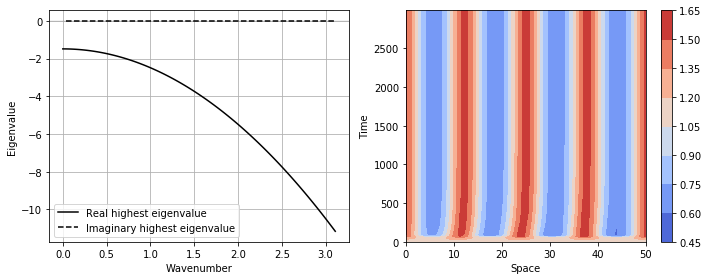

turing I hopf
1.0 4.560231432913908
163670.1


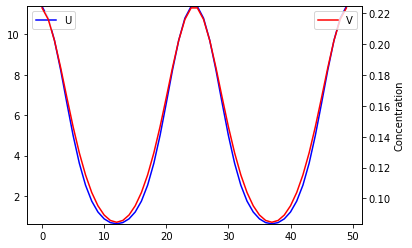

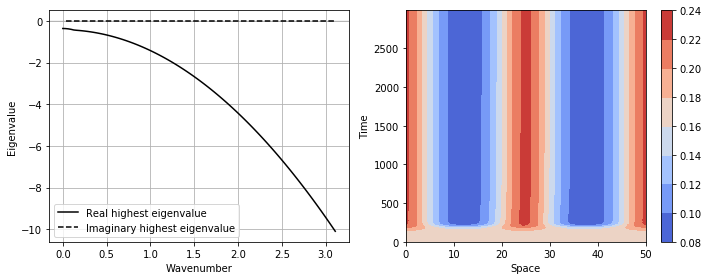

hopf
1.0 0.5935703069281866
168073.2


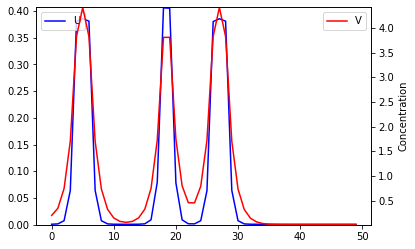

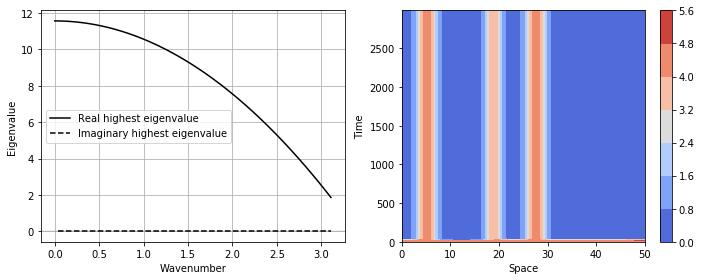

hopf
1.0 1.0760690302922256
168530.1


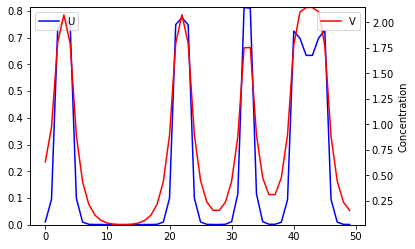

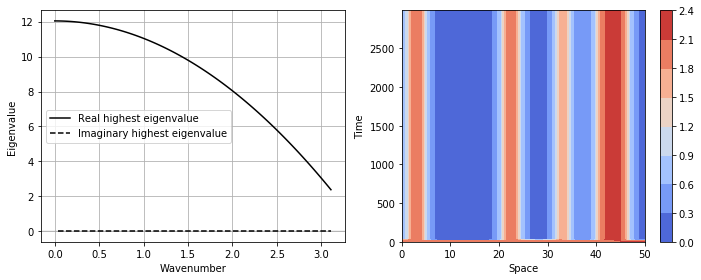

hopf
1.0 1.8594526880531232
174489.2


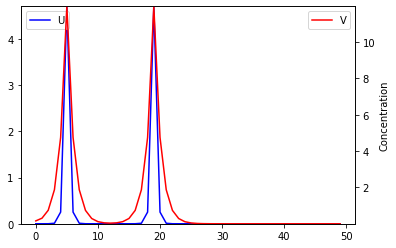

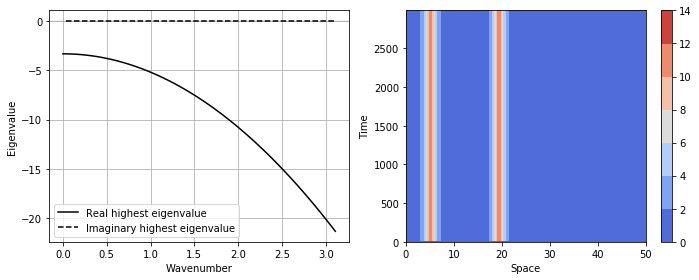

hopf
1.0 0.0017897348642273818
197561.2


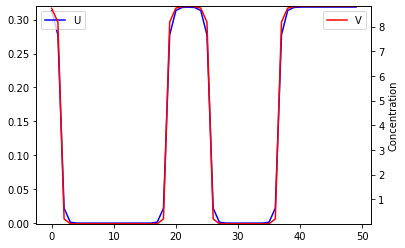

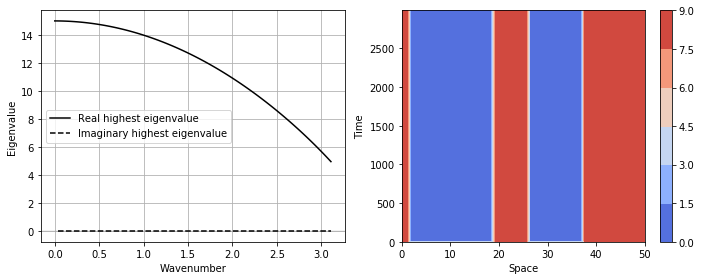

turing I hopf
1.0 6.096601964123231
202171.0


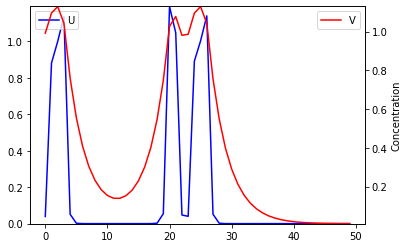

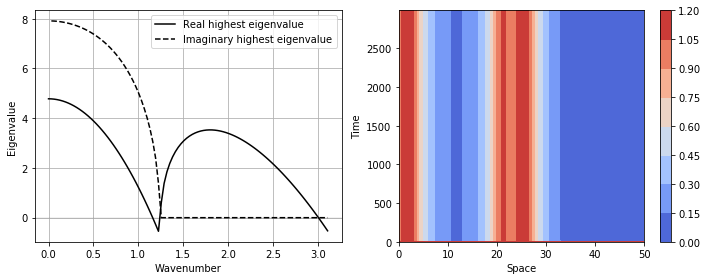

turing I hopf
1.0 4.2683175611893835
214640.2


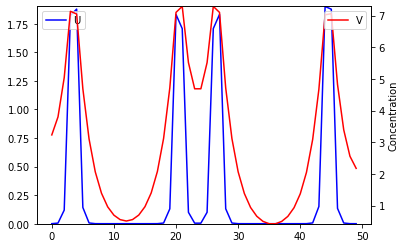

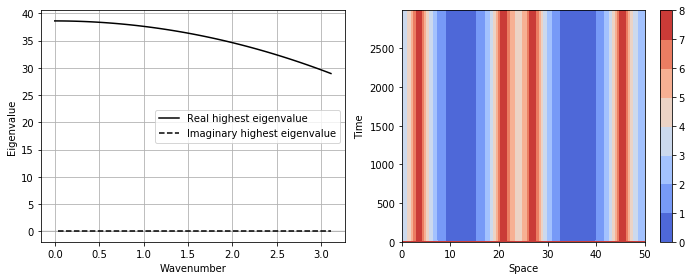

turing I hopf
1.0 7.16966141819312
245544.2


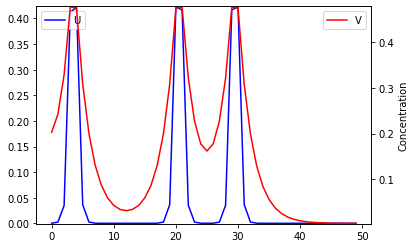

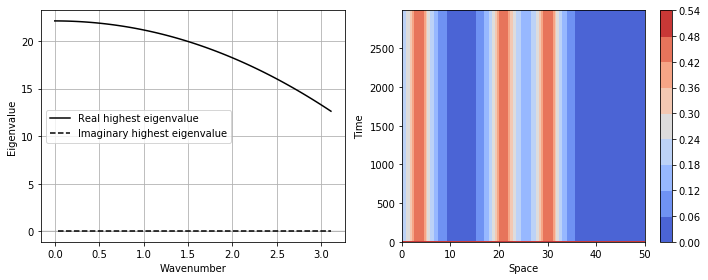

turing I hopf
1.0 4.967381875971865
277562.0


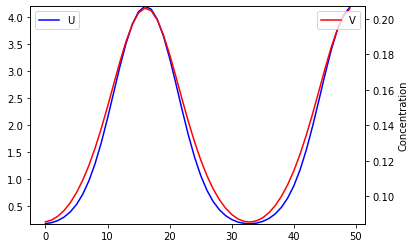

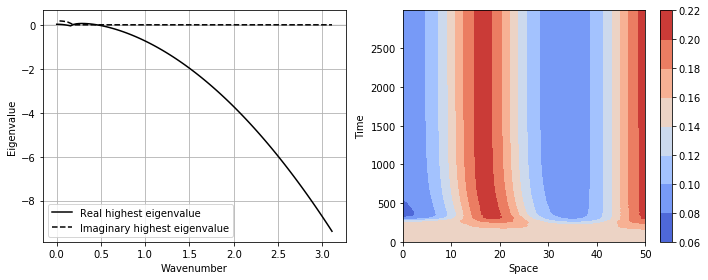

turing I hopf
1.0 5.246224578586386
317454.2


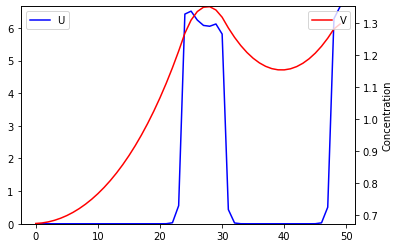

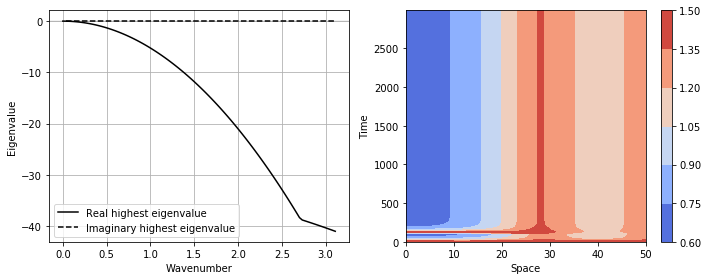

hopf
1.0 0.003212631989437097
320872.2


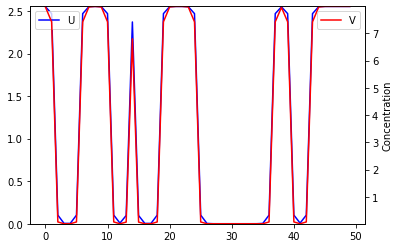

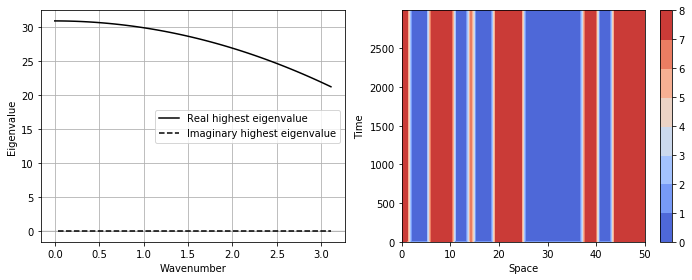

hopf
1.0 5.712020792405703
341860.1


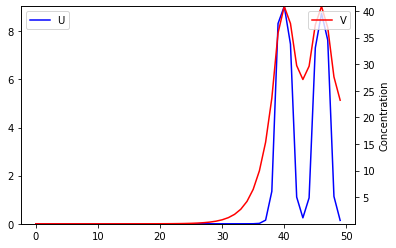

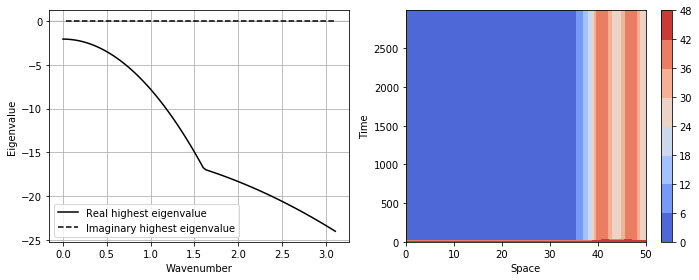

turing I hopf
1.0 6.696101524954267
342322.0


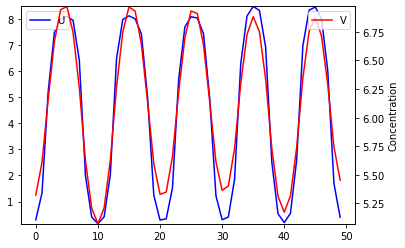

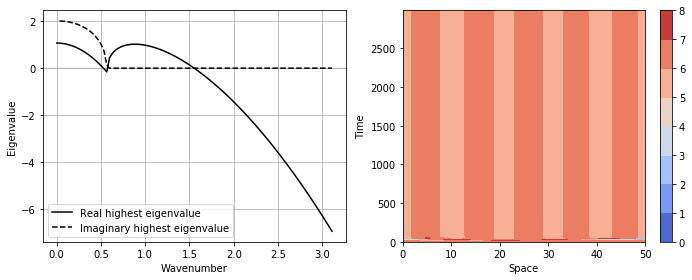

turing I oscillatory
1.0 8.87692980159737
351953.1


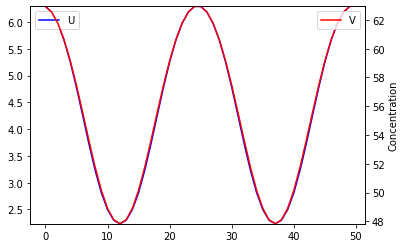

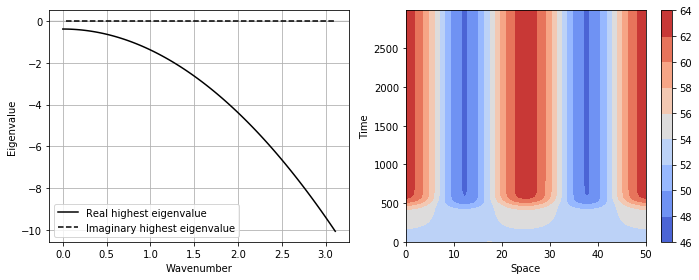

turing I
1.0 7.772167659674627
360416.1


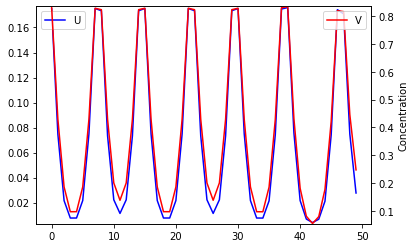

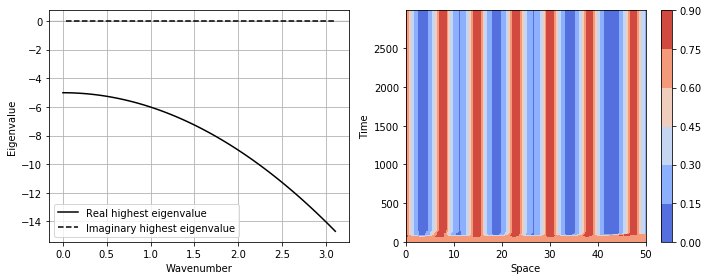

turing I hopf
1.0 8.796148014663103
362080.1


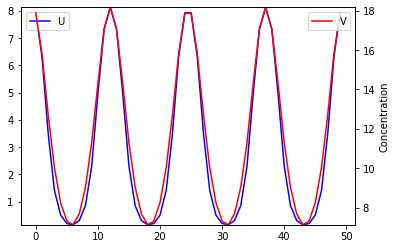

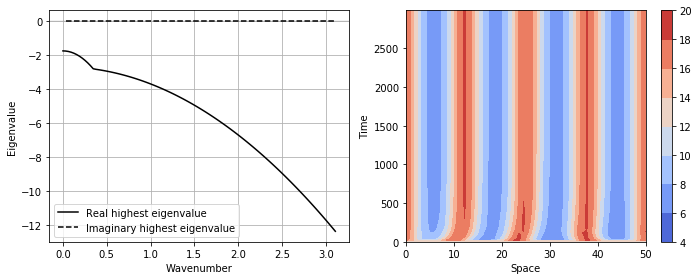

hopf
1.0 0.0030103141650019744
371416.2


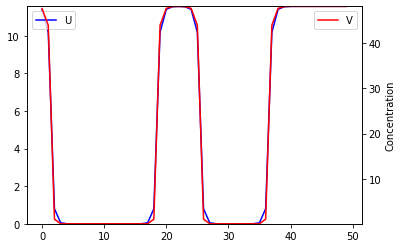

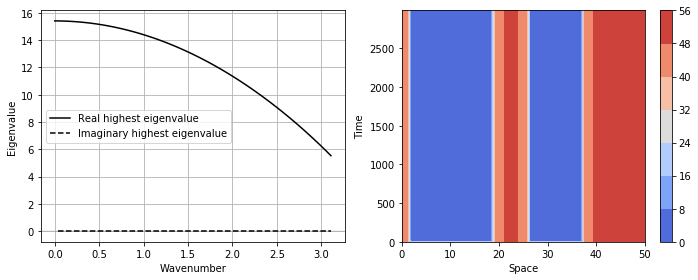

turing I hopf
1.0 4.337285462960912
381439.0


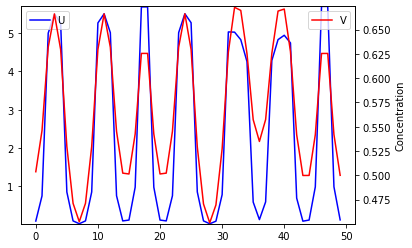

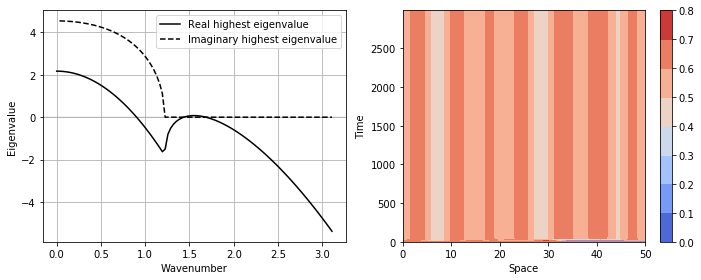

hopf
1.0 3.748892084037471
383741.2


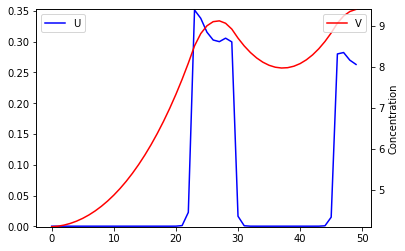

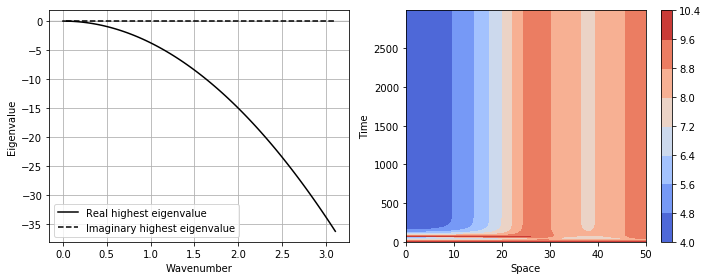

hopf
1.0 2.546467979068793
385267.2


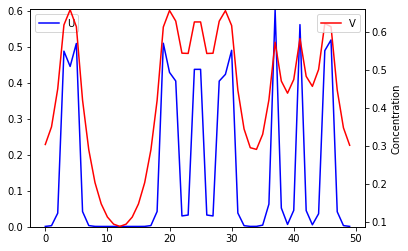

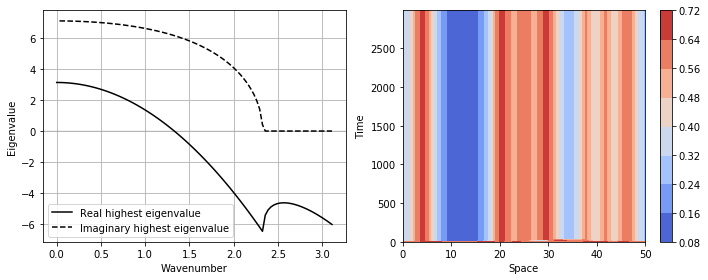

hopf
1.0 7.944313402607668
390760.0


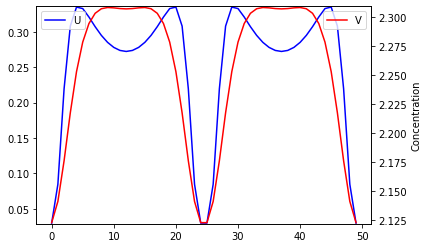

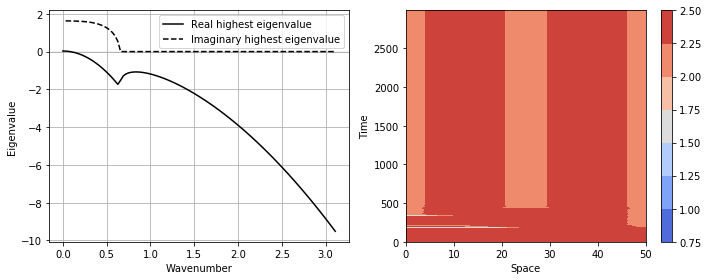

hopf
1.0 0.0052734354353926
396733.2


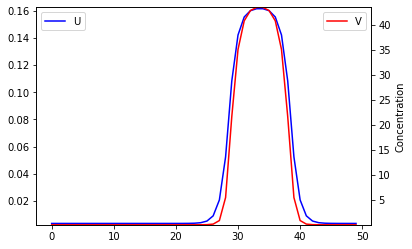

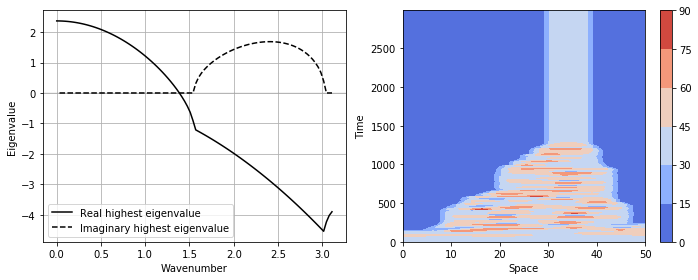

hopf
1.0 3.658386344971312
402761.1


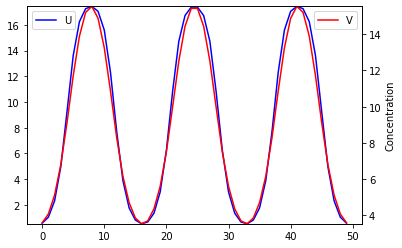

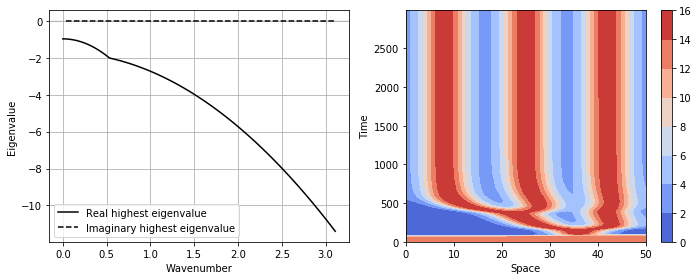

hopf
1.0 2.5280580354601687
404647.1


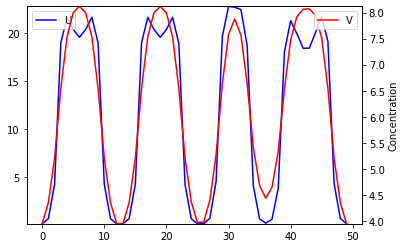

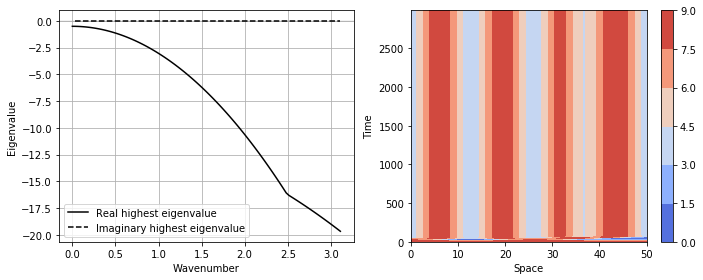

hopf
1.0 2.6291143723459585
408899.2


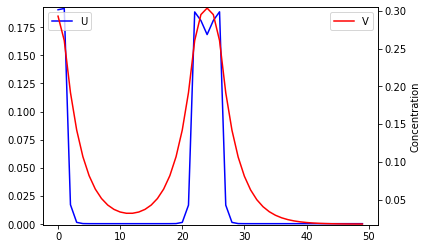

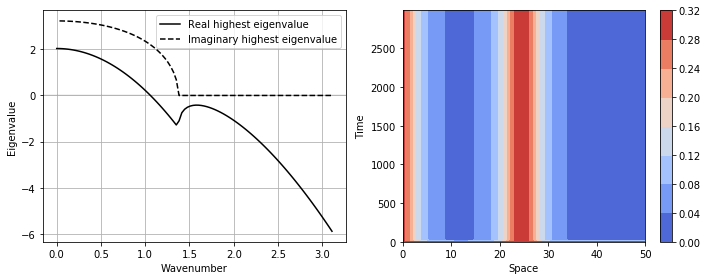

turing I hopf
1.0 9.083241116948946
415375.2


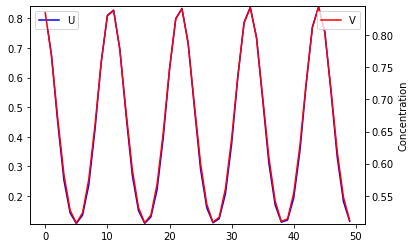

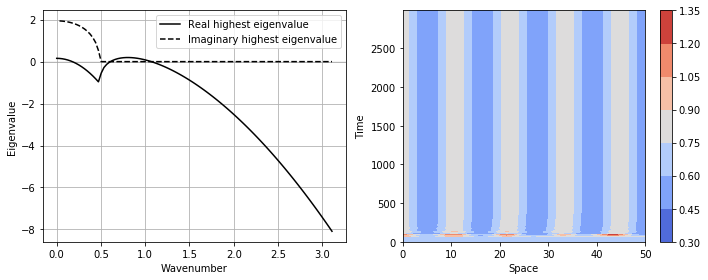

hopf
1.0 5.633699964903917
431243.1


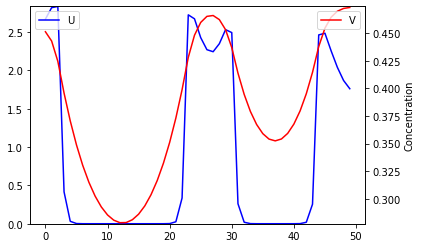

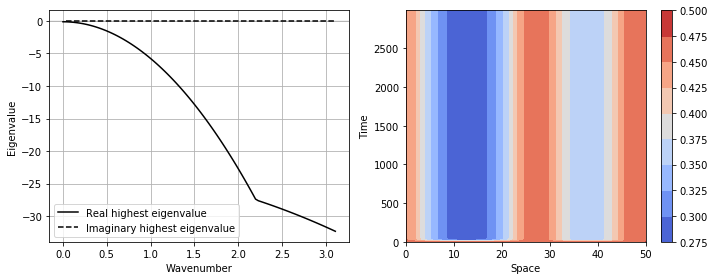

hopf
1.0 0.1931445668259795
444816.0


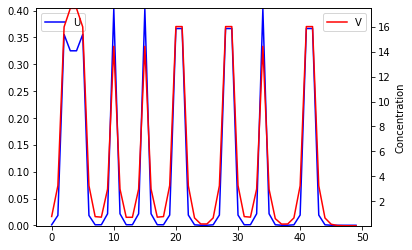

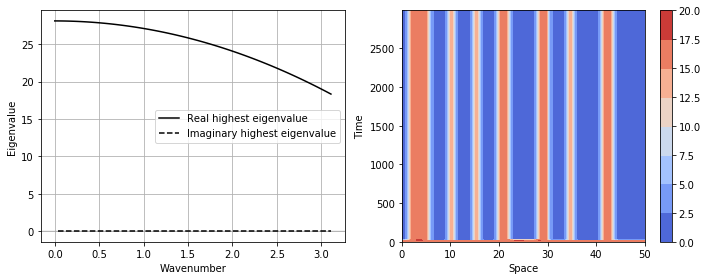

turing I hopf
1.0 9.962530607630516
470544.0


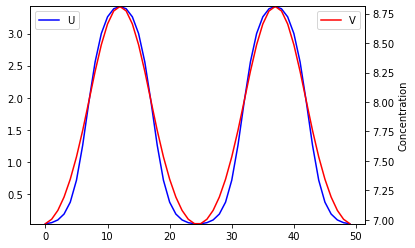

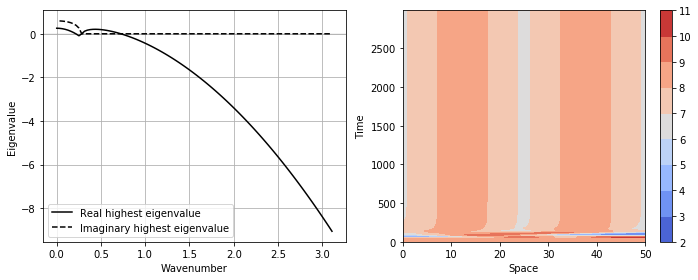

turing I oscillatory
1.0 6.620820479626943
472883.2


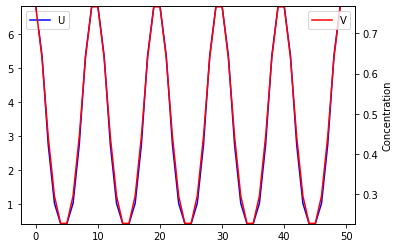

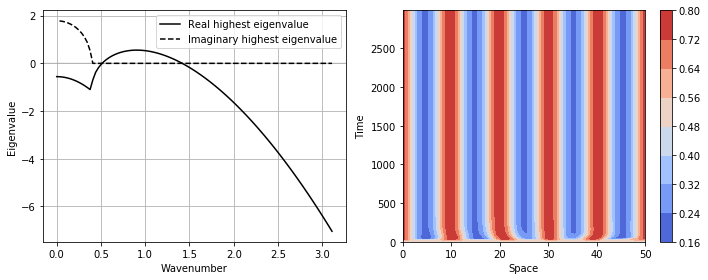

hopf
1.0 0.0018573450421184952
480724.2


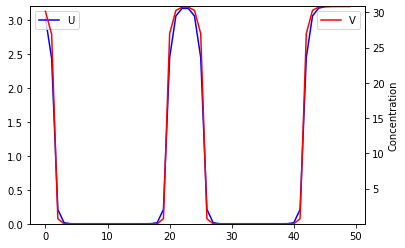

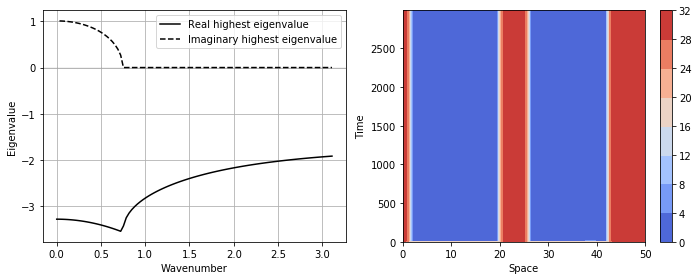

hopf
1.0 0.010250213261066048
490997.2


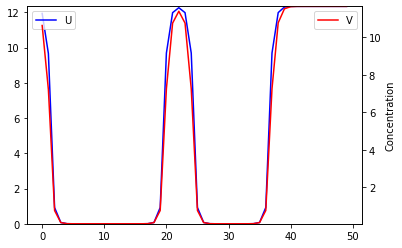

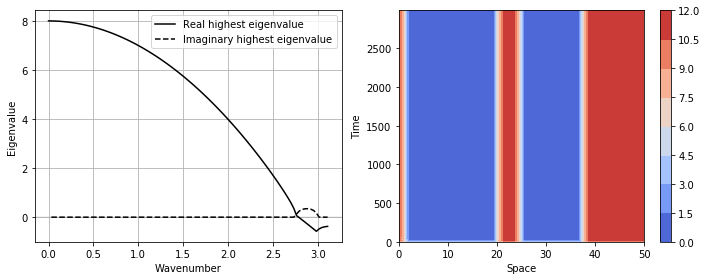

turing I hopf
1.0 7.357938347237434
493529.1


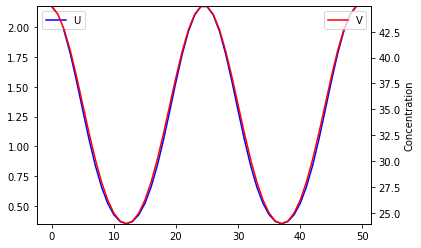

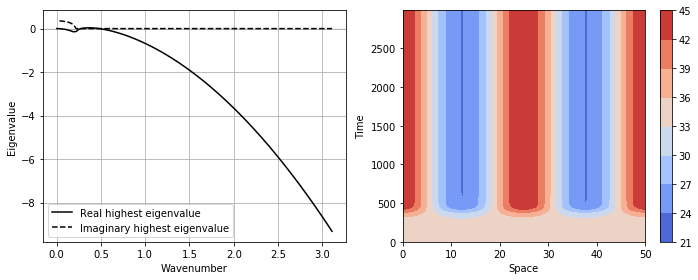

turing I hopf
1.0 6.591860046201509
517558.2


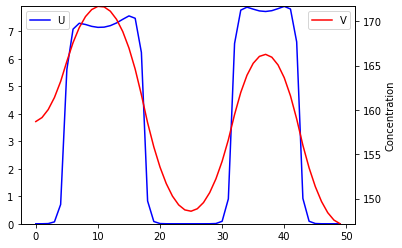

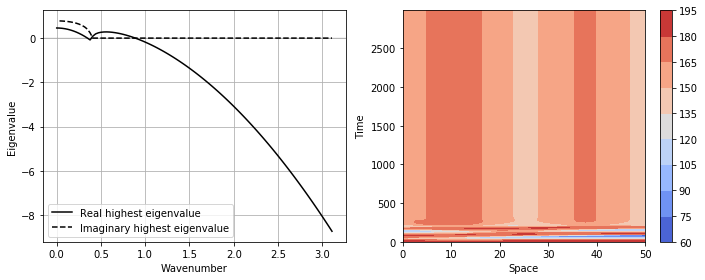

turing I hopf
1.0 9.882600413170454
522681.2


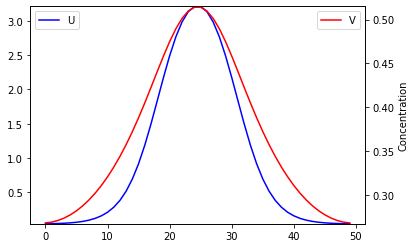

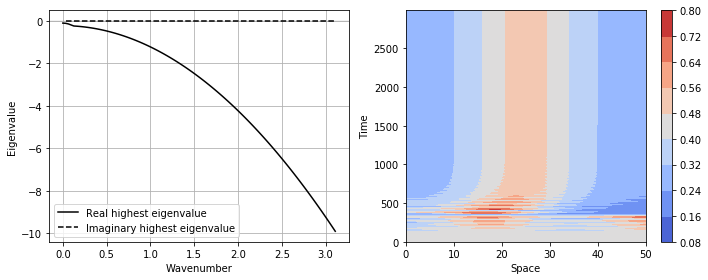

turing I hopf
1.0 9.31297197124905
541651.1


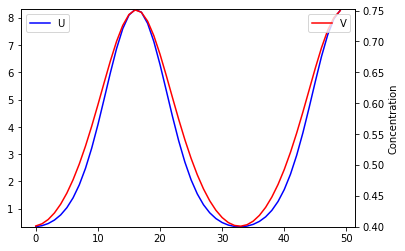

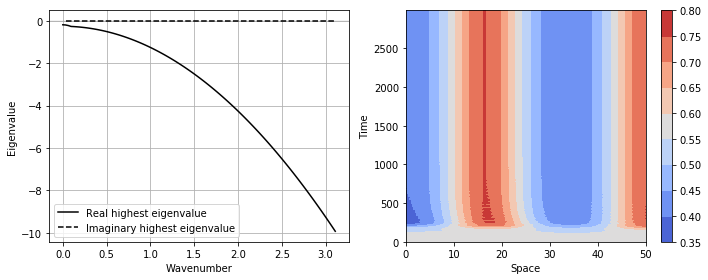

hopf
1.0 9.603203522441344
544548.0


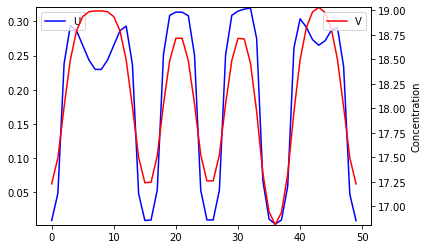

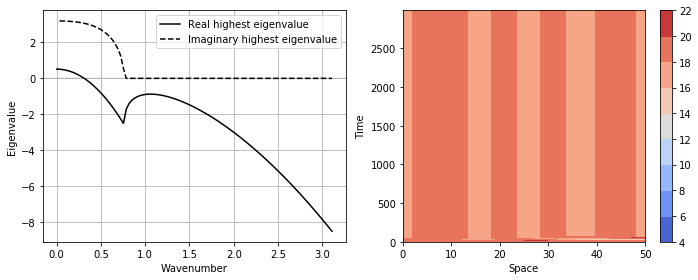

hopf
1.0 1.5402296921246355
555217.2


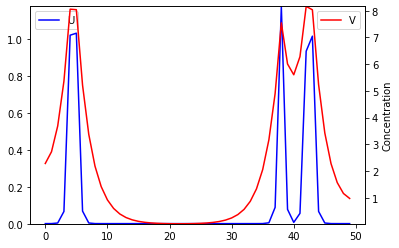

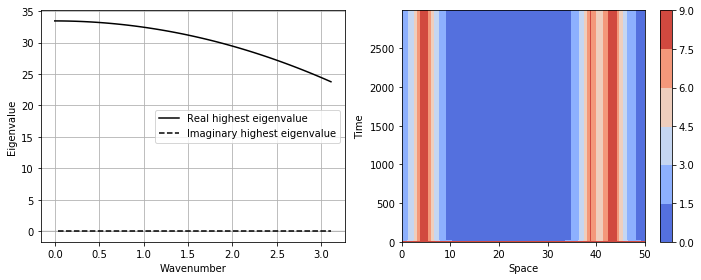

turing I hopf
1.0 9.428581322267908
555482.1


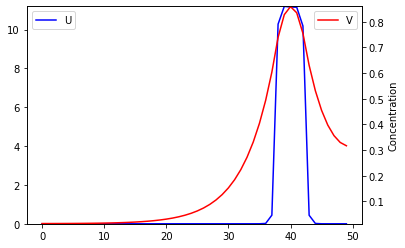

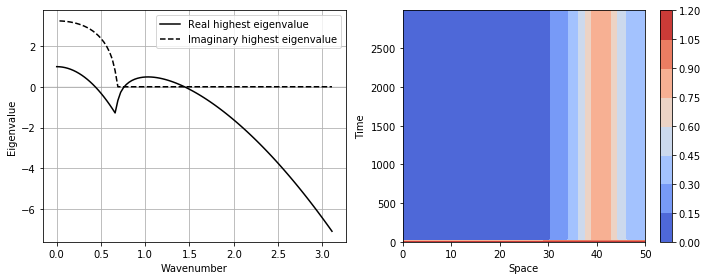

hopf
1.0 2.7399221639392928
558420.2


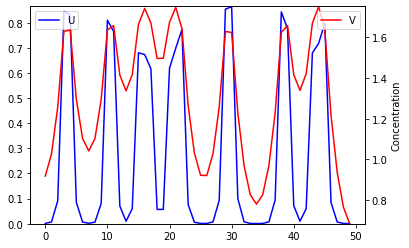

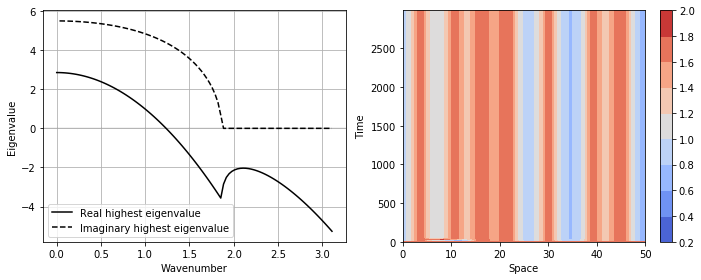

hopf
1.0 7.381238030964149
559638.1


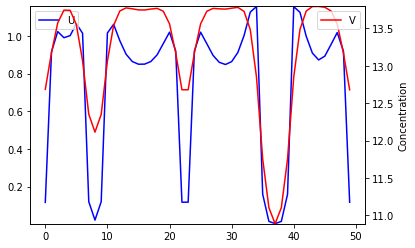

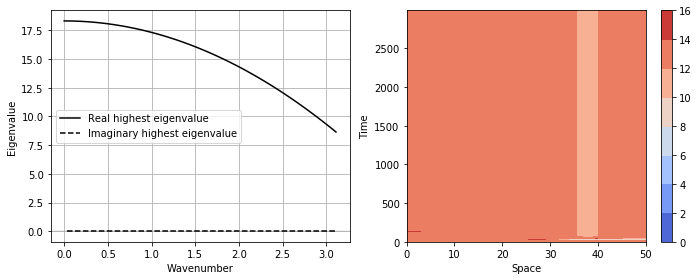

hopf
1.0 1.9622168360784096
586998.2


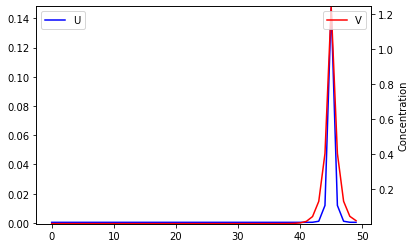

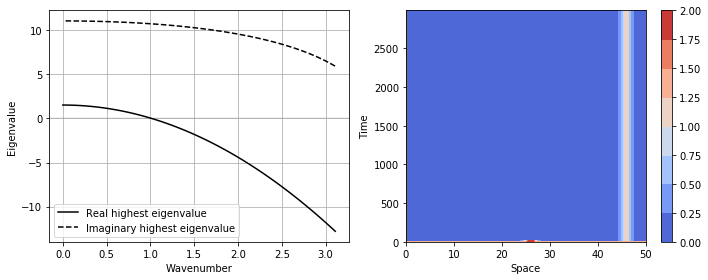

hopf
1.0 0.001051878686053172
589401.2


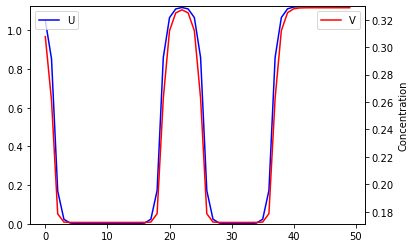

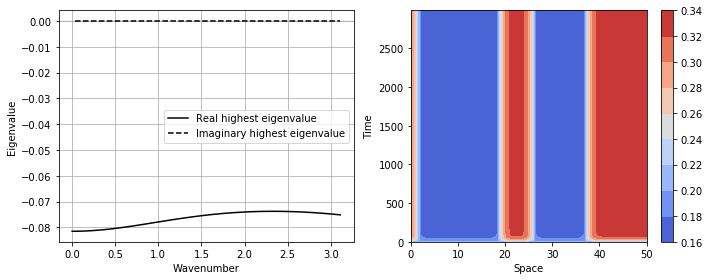

hopf
1.0 6.54920732330942
595667.1


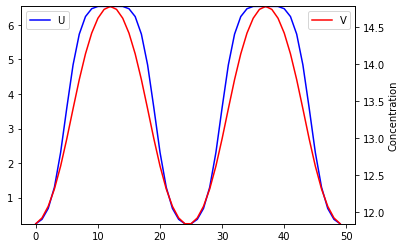

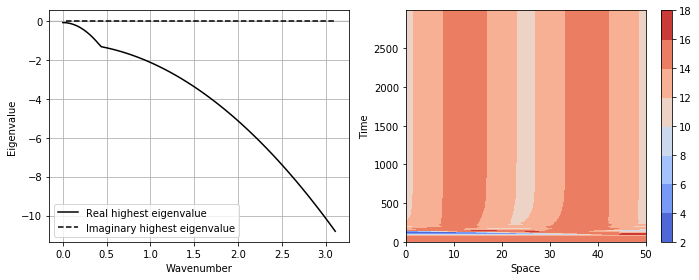

hopf
1.0 1.5227143818685087
640901.1


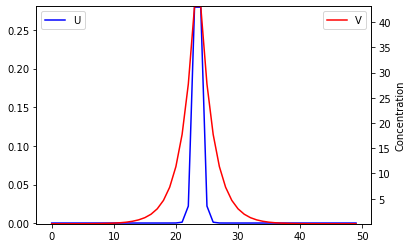

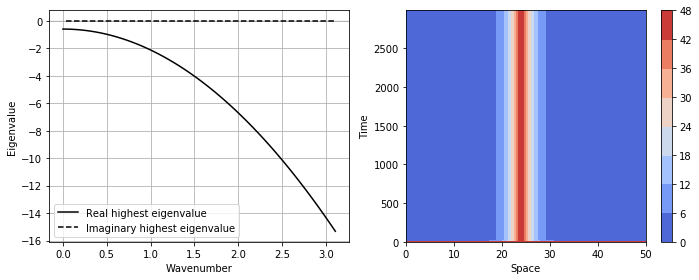

hopf
1.0 7.810822478346056
645223.0


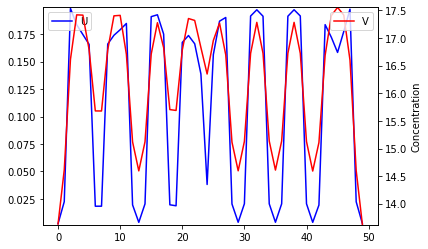

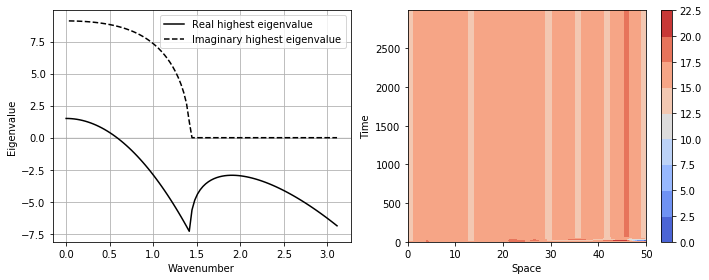

hopf
1.0 1.8449124720129355
650055.2


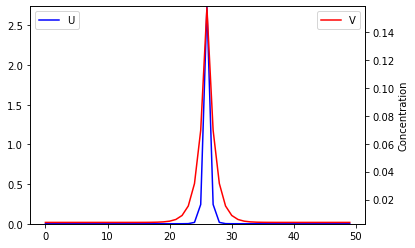

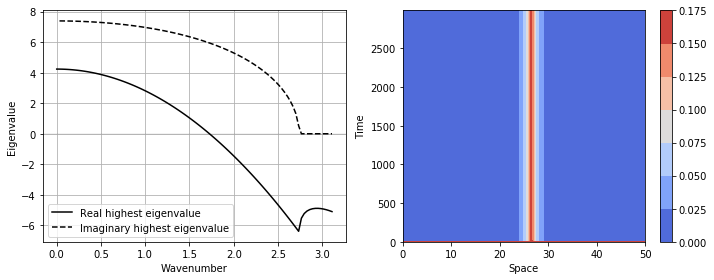

turing I hopf
1.0 8.556385096934026
660035.2


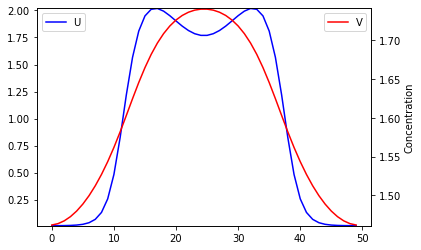

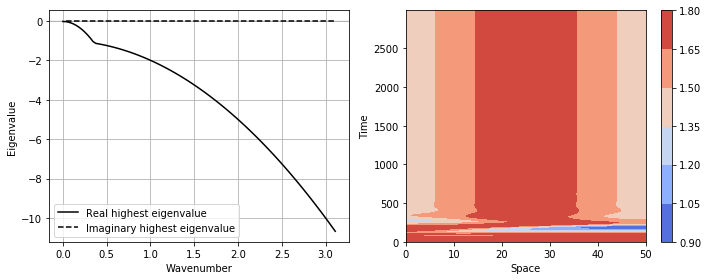

turing I hopf
1.0 6.952179683151499
662630.2


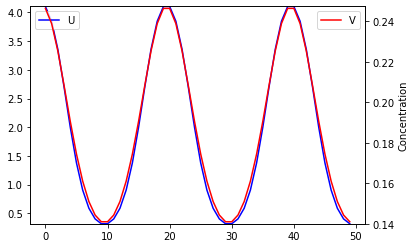

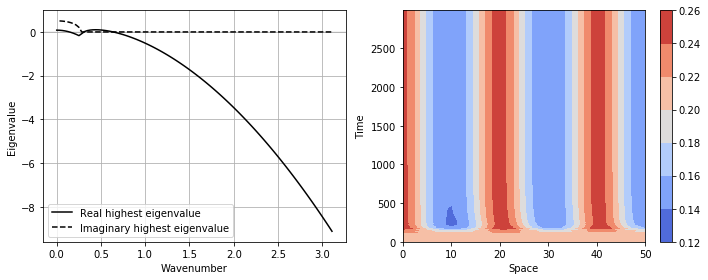

hopf
1.0 1.209965708622696
667070.2


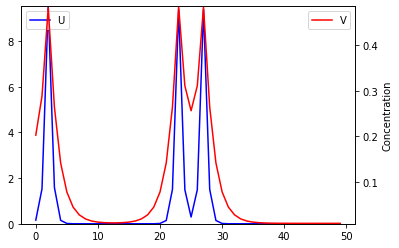

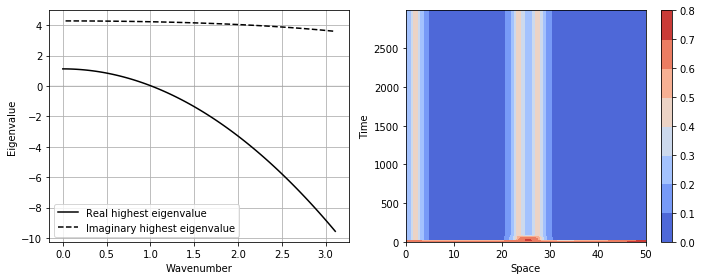

hopf
1.0 5.41852363611355
670265.2


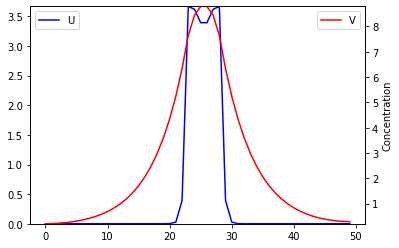

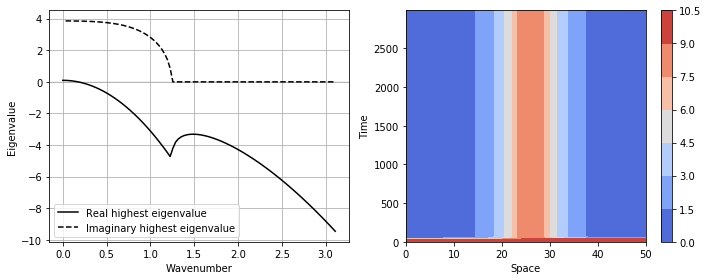

hopf
1.0 8.256836689719753
704952.2


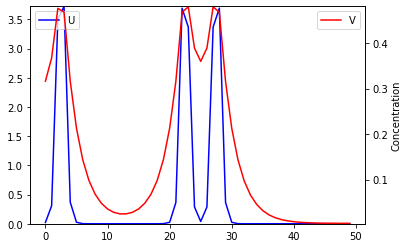

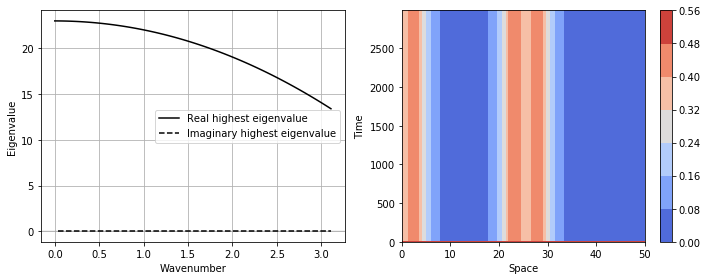

hopf
1.0 7.416389384017423
705005.1


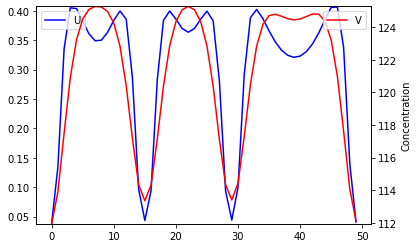

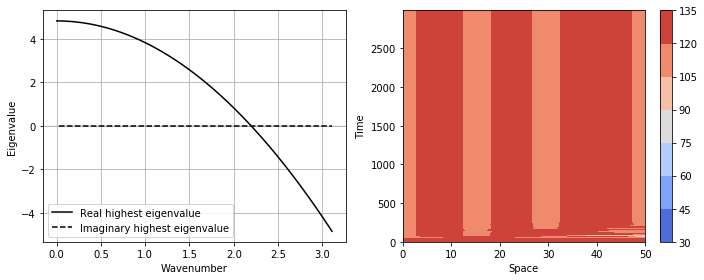

hopf
1.0 5.079732609267814
724747.2


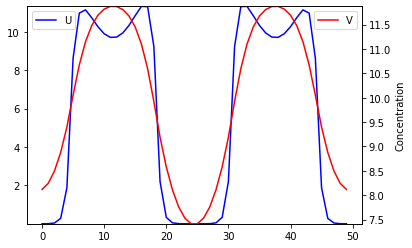

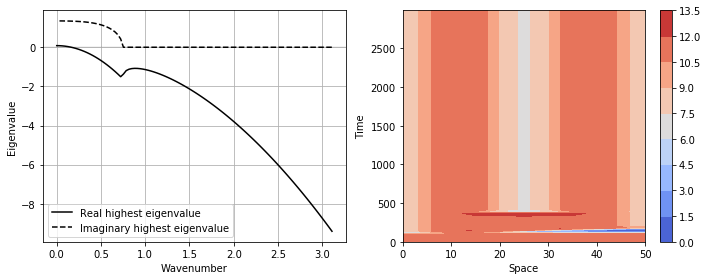

hopf
1.0 2.194014987435199
746452.0


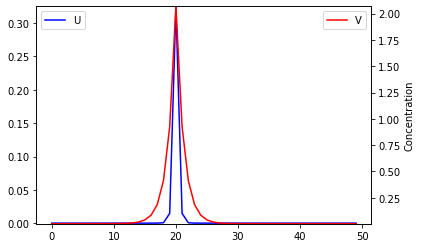

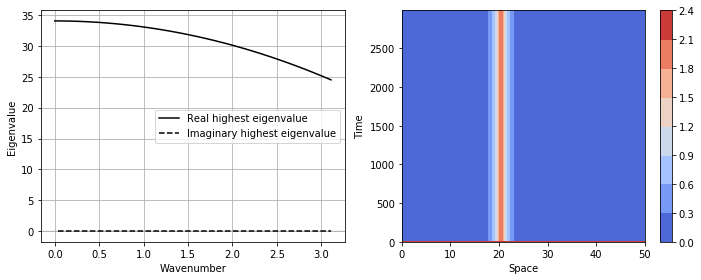

hopf
1.0 0.0021830961978543464
750557.2


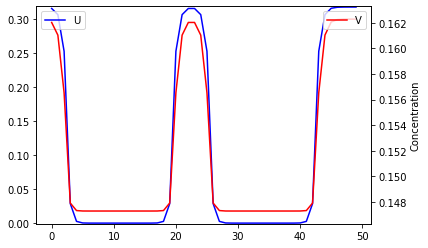

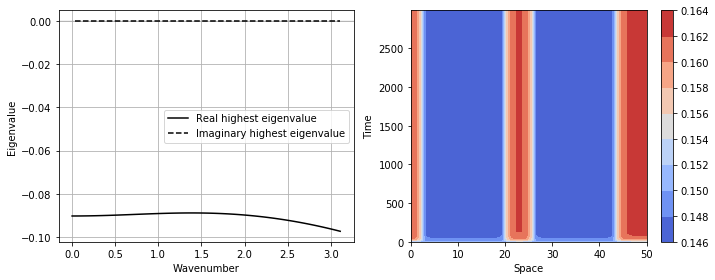

hopf
1.0 3.8397073524722445
759442.0


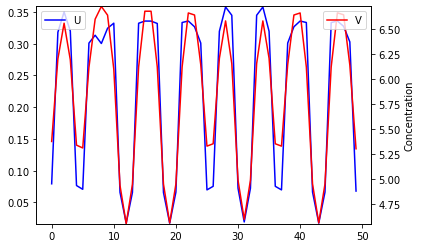

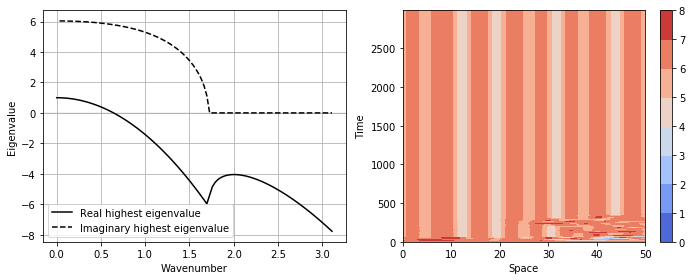

hopf
1.0 0.0011504838499114727
787165.1


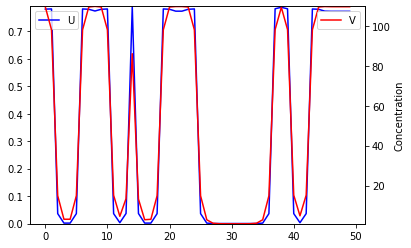

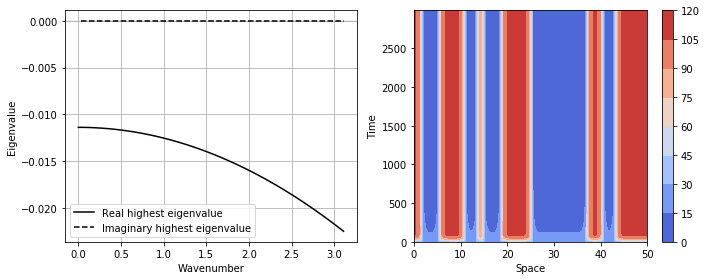

hopf
1.0 8.043638466312595
787411.2


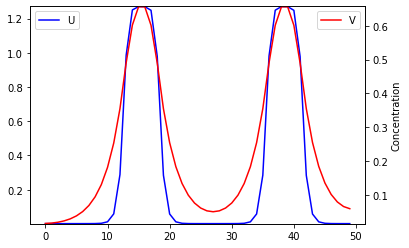

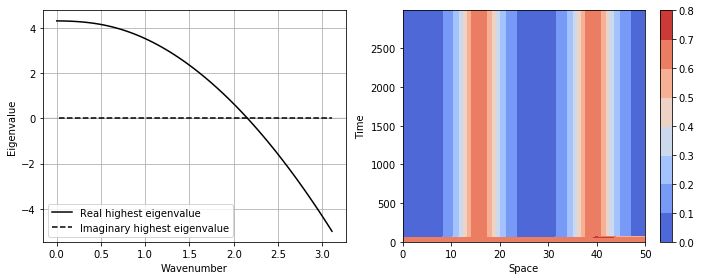

hopf
1.0 0.0013459952605549632
822926.1


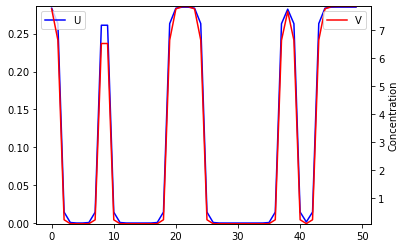

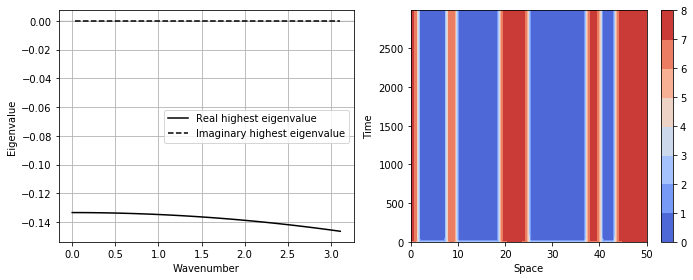

hopf
1.0 0.001756771879248409
833205.2


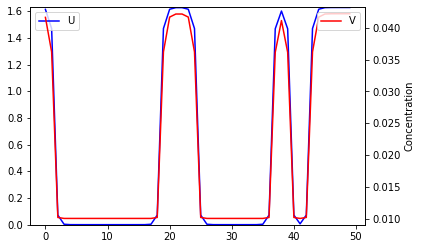

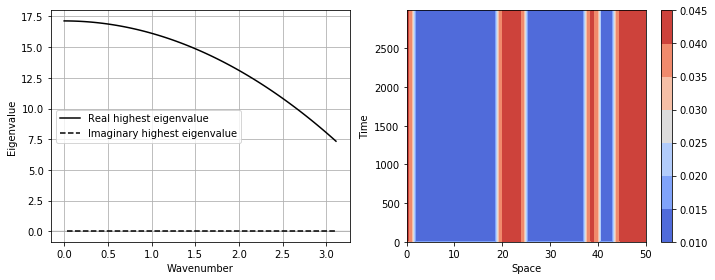

turing I hopf
1.0 7.157093512861056
837792.1


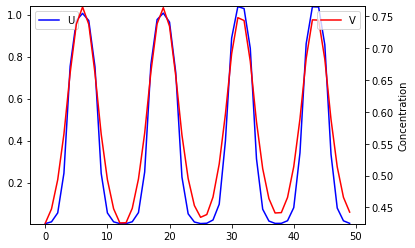

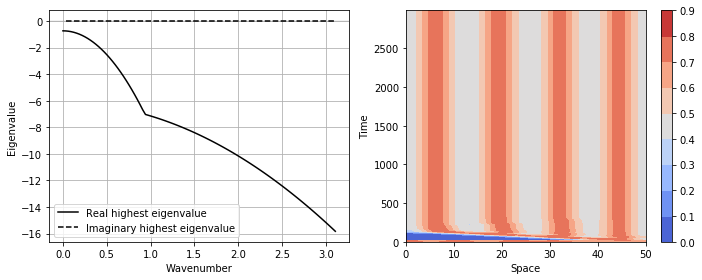

hopf
1.0 0.0036518833379758833
841237.2


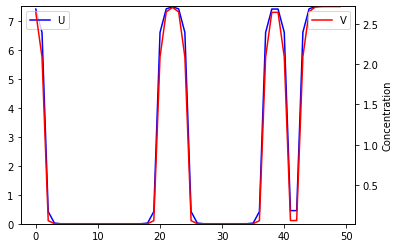

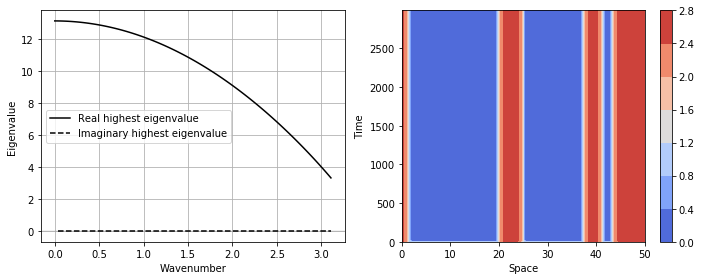

hopf
1.0 3.3290064736091387
857063.1


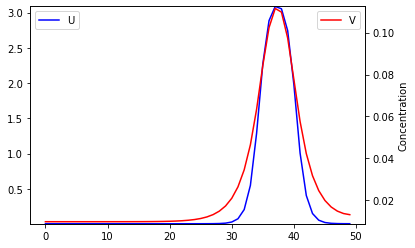

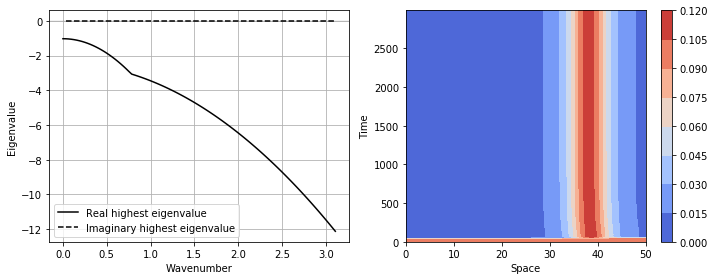

hopf
1.0 4.311787252378238
861883.2


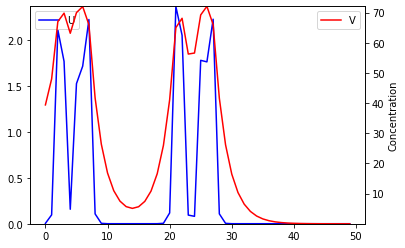

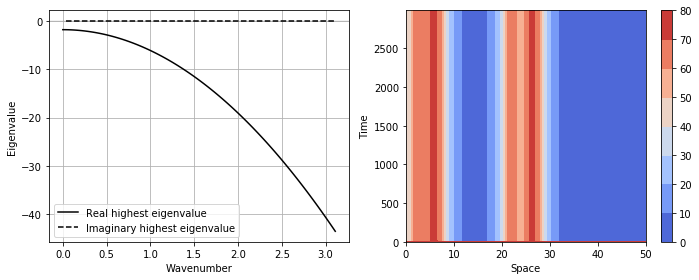

turing I hopf
1.0 3.741442384862244
875940.1


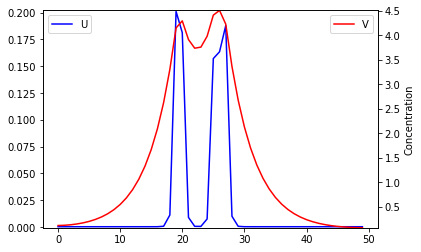

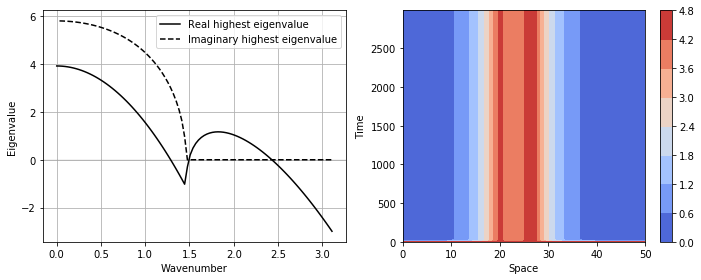

turing I hopf
1.0 9.922253357039363
885770.2


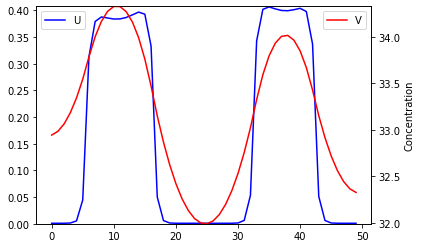

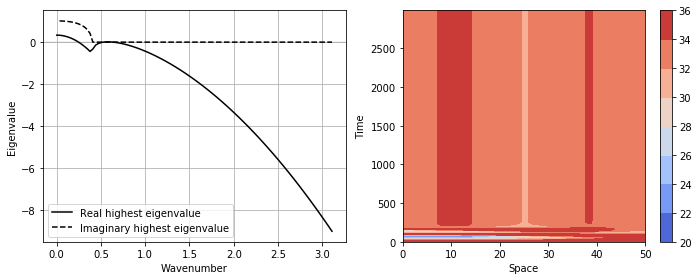

hopf
1.0 4.391198393137343
911476.2


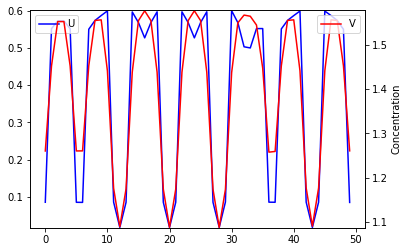

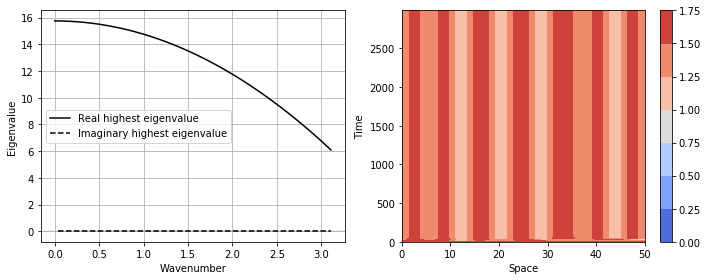

hopf
1.0 0.013550622001481081
928081.1


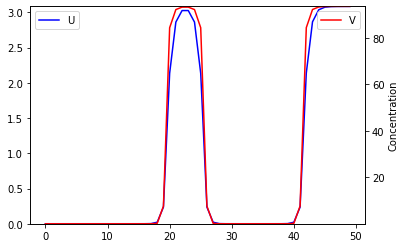

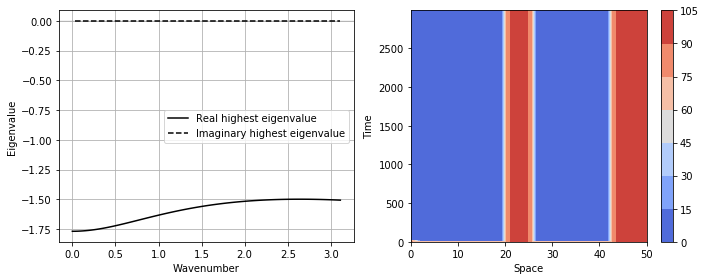

hopf
1.0 0.18120882551778783
941178.2


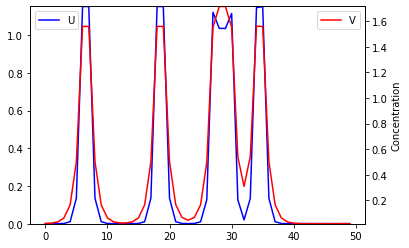

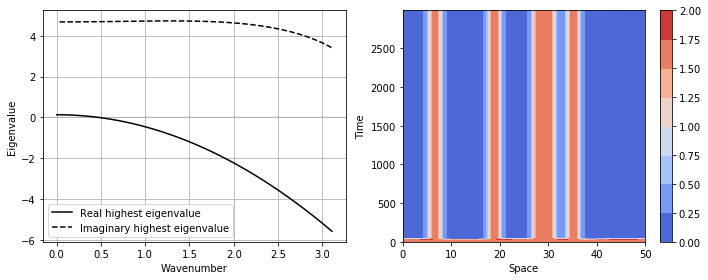

hopf
1.0 4.464319434373026
952465.2


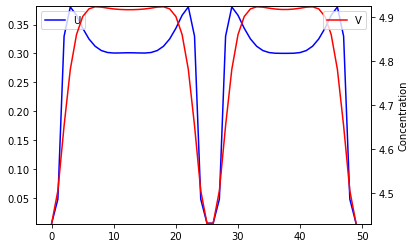

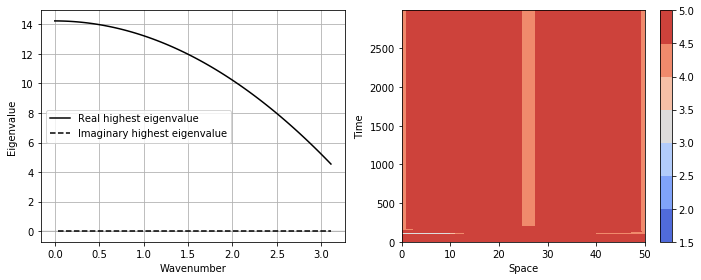

hopf
1.0 0.012959387461060335
953887.1


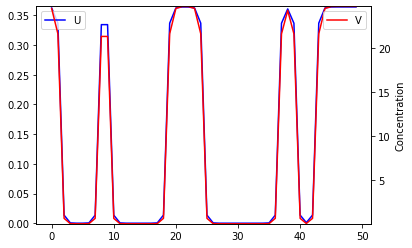

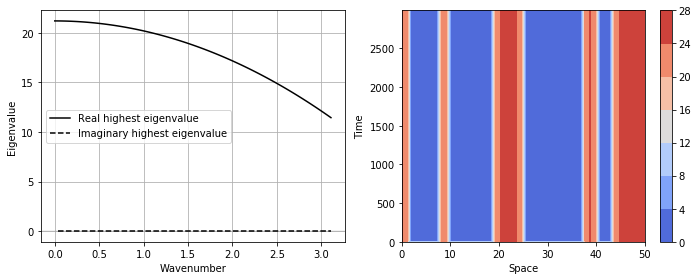

turing I hopf
1.0 9.949928571372155
958350.1


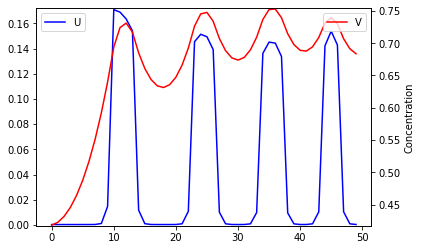

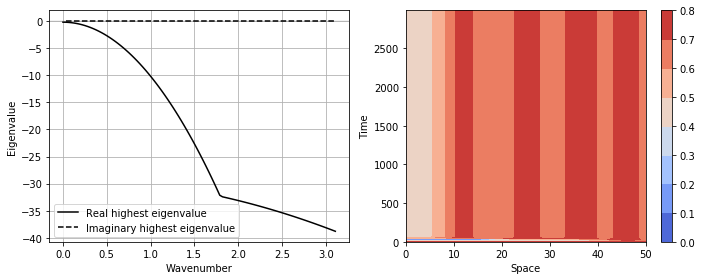

hopf
1.0 4.489025088151757
991509.1


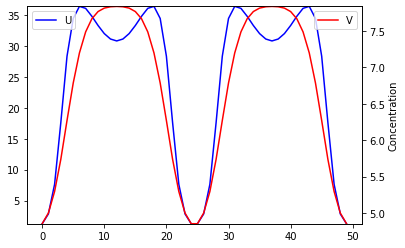

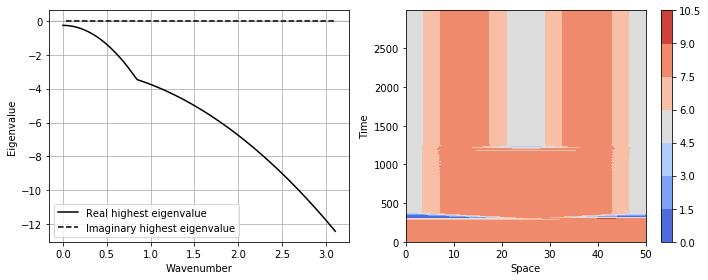

hopf
1.0 4.358931575551781
994786.2


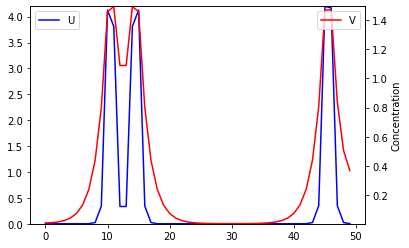

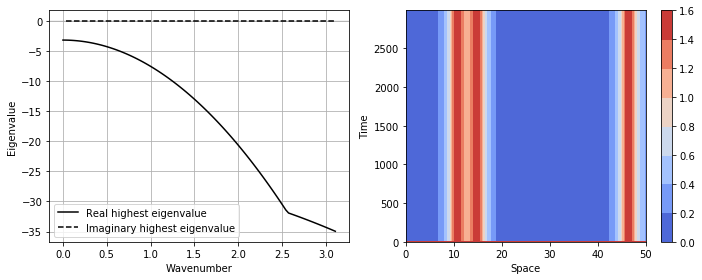

hopf
1.0 7.429408453568185
1002660.1


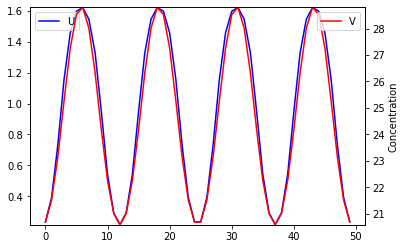

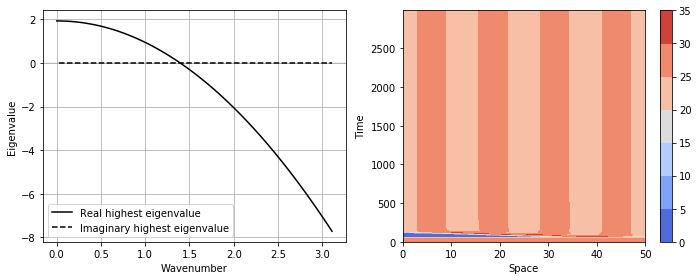

hopf
1.0 4.842910204551366
1005199.2


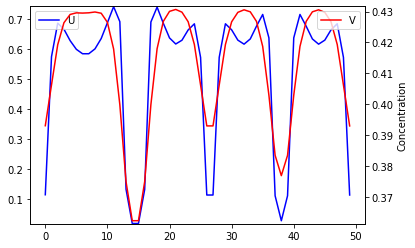

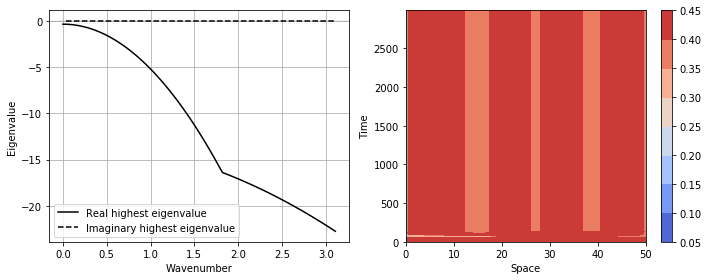

hopf
1.0 0.0011707102516720761
1005525.2


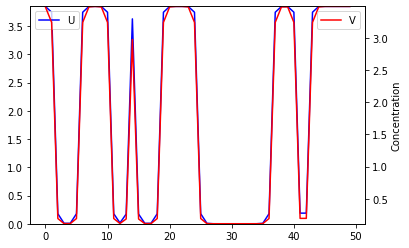

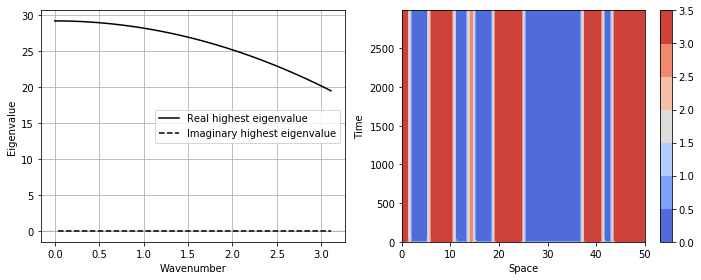

hopf
1.0 0.004500141213974898
1021779.2


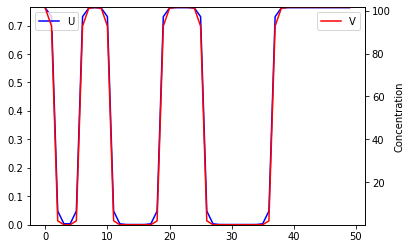

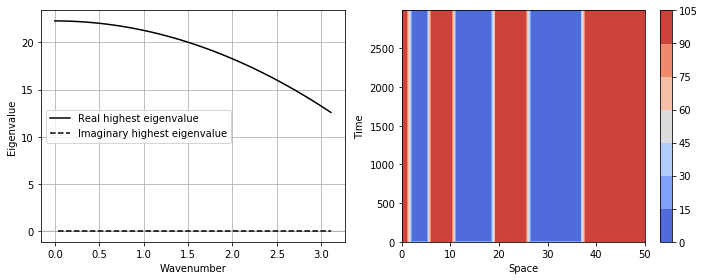

turing I hopf
1.0 8.387404692934325
1031490.1


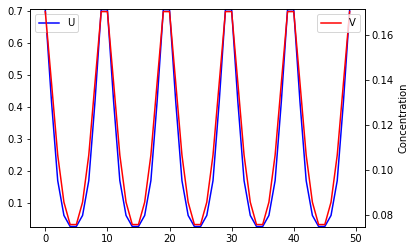

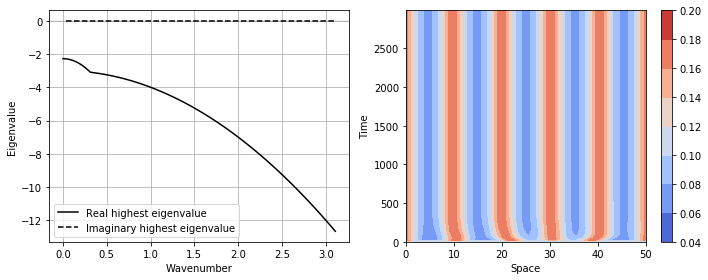

turing I hopf
1.0 5.258866460266451
1032246.0


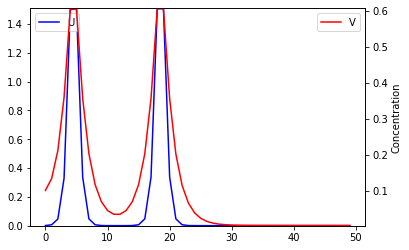

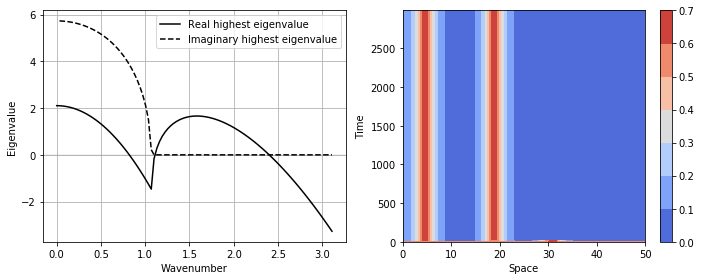

hopf
1.0 5.207755129515688
1035012.2


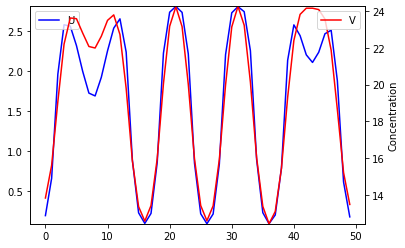

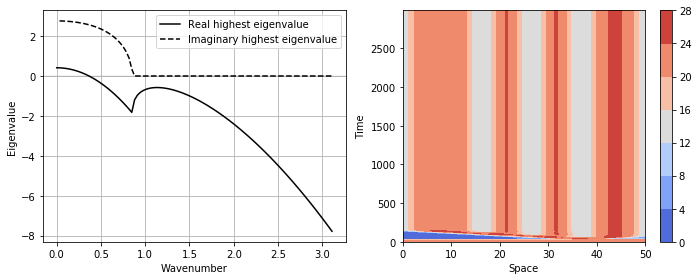

hopf
1.0 0.6024420980222885
1047315.1


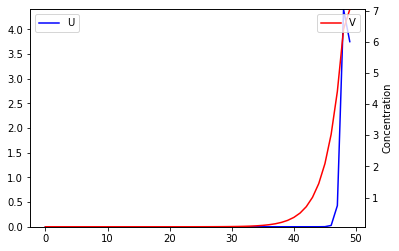

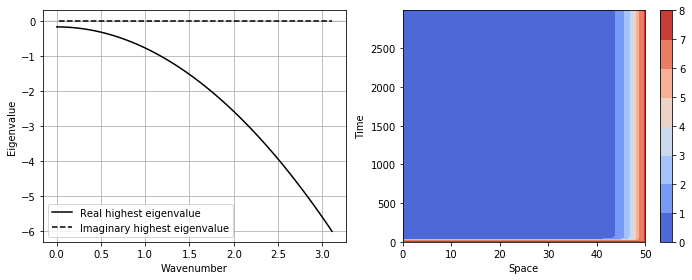

hopf
1.0 4.818259551077748
1052078.3


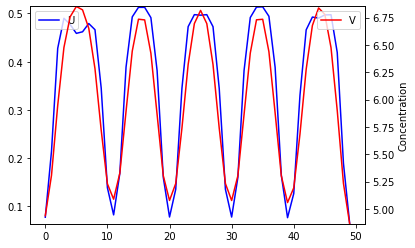

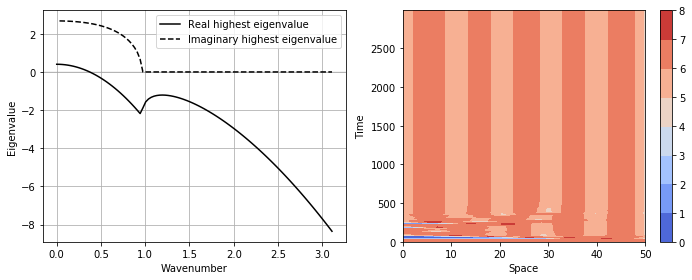

hopf
1.0 1.2323253477576785
1052321.2


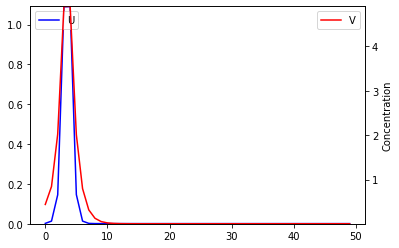

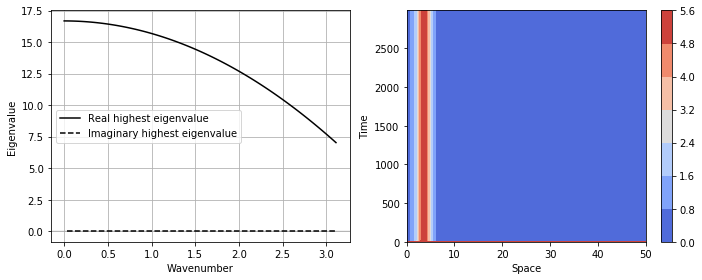

hopf
1.0 0.0076873365322799175
1062528.0


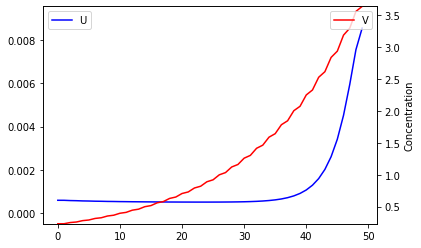

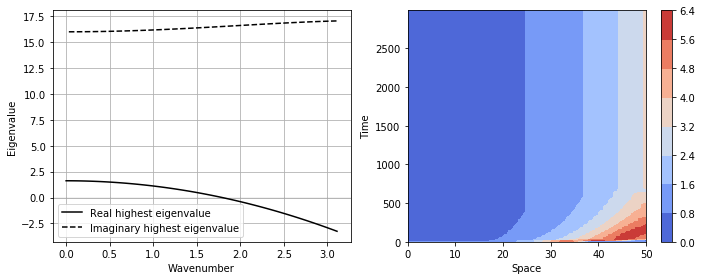

turing I hopf
1.0 8.163703645426176
1063453.2


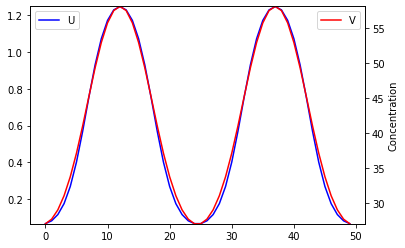

KeyboardInterrupt: 

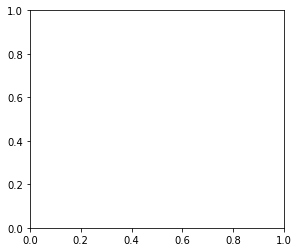

In [6]:
for parIDindex in df1.index:
    
    
    par_dict = df1.loc[parIDindex].to_dict() #converts a dataframe row into a dictionary outputing a dictionary for a specific parameter set
    print(par_dict['system_class'])
    print(par_dict['d_A'],par_dict['d_B'])

    # #load records 
    parIDss = f'{parIDindex[0]}.{parIDindex[1]}'
    print(parIDss)

    # U_final = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/simulation/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parIDss)), 'rb'))
    # U_record = pickle.load( open(modellingephemeral + '/growth/out/numerical/%s/%s/simulation/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(mechanism,parIDss)), 'rb'))



    parID_display(parIDss,L,J,T, crop=100)

    # #check if flat with diff function
    # diffUfinal = np.round(np.diff(U_final),decimals=3)
    # if np.all(diffUfinal==0)==True:
    #     flat=True
    # else:
    #     flat=False

    # #check if convergence with diff function
    # diffUrecord = np.round(np.diff(U_record[1][-10:], axis=0),decimals=6)
    
    # if np.all(diffUrecord==0) ==True:
    #     converged=True
    # else:
    #     converged=False
    # time_vector = [U_record[0][x][10] for x in range(len(U_record[0]))]
    # # autocorr(np.array(time_vector))
    # print(f'flat: {flat}, converged: {converged}')
    # print('\n')


## Turing I Hopf

In [ ]:
df1 = pattern_df.loc[(pattern_df['system_class']=='turing I hopf') &  (pattern_df['pattern']=='Non-Stationary heterogeneity')]
print(pattern_df.loc[pattern_df['system_class']=='turing I hopf']['pattern'].value_counts())


Temporal Oscillator             569
Homogeneous                      30
Non-Stationary heterogeneity     11
Stationary periodic wave          6
Name: pattern, dtype: int64


192571


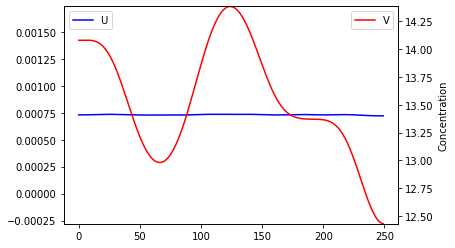

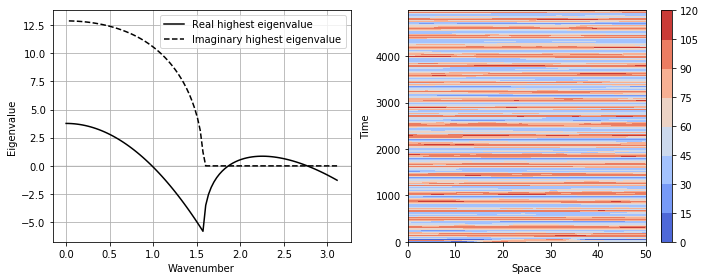

flat: False, converged: False


669362


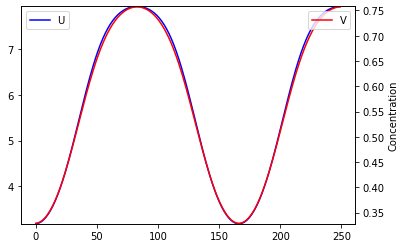

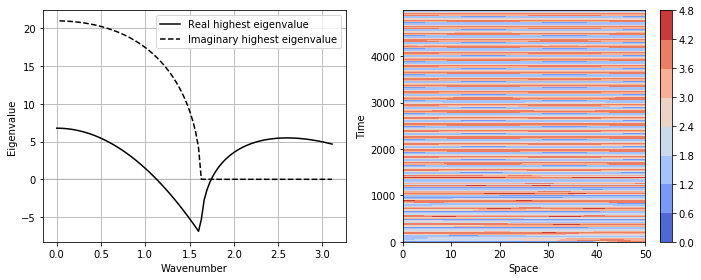

flat: False, converged: False


950793


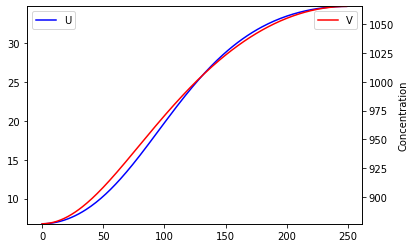

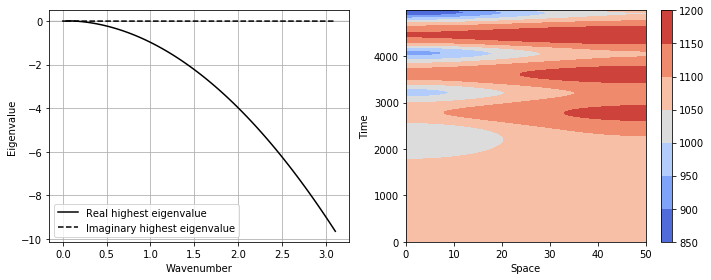

flat: False, converged: False


986009


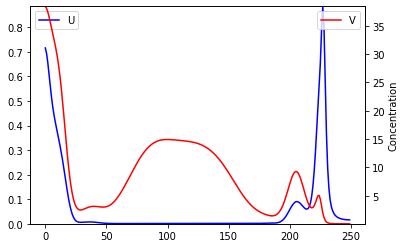

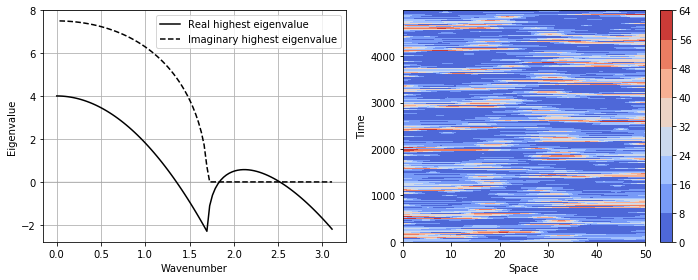

flat: False, converged: False


1338269


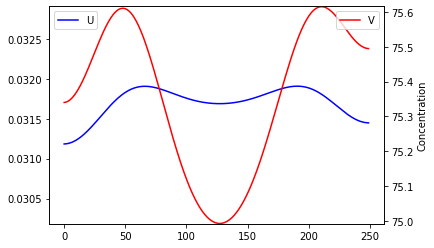

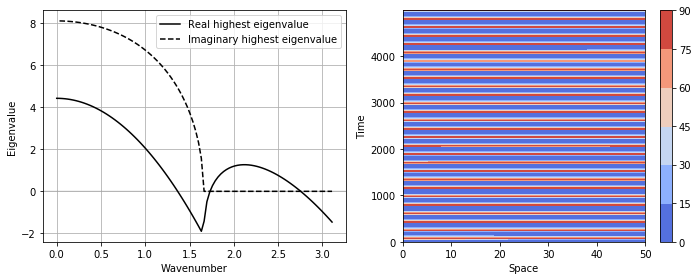

flat: False, converged: False


1499747


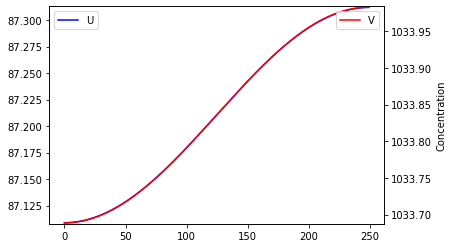

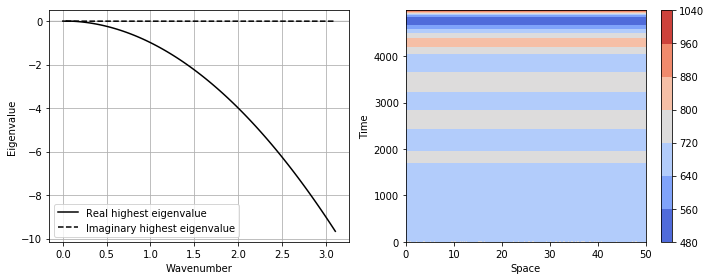

flat: False, converged: False


1616819


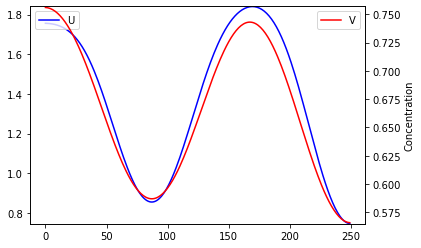

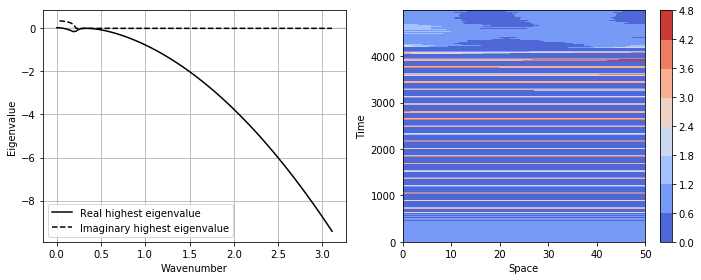

flat: False, converged: False


1711247


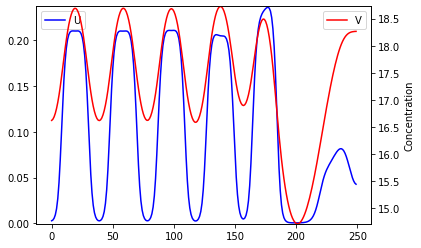

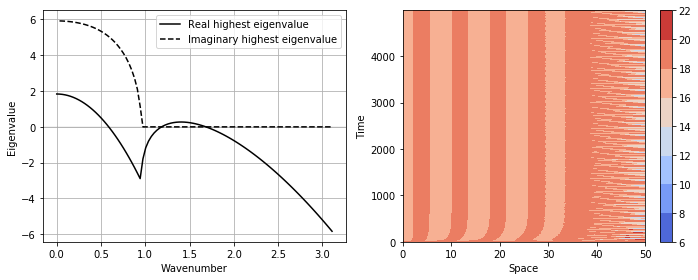

flat: False, converged: False


1878903


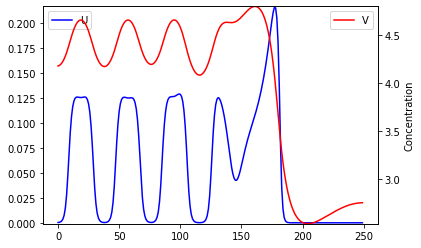

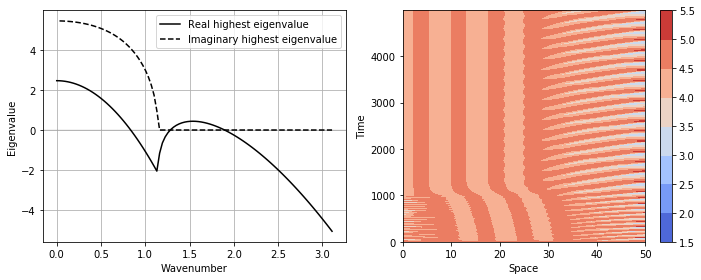

flat: False, converged: False




In [ ]:
for parID in df1.index:
    if pattern_df.loc[parID]['ss_n']==1:
        print(parID)
        # print(pattern_df.loc[parID])
        # print(pattern_df.loc[parID]['ss_n'])
        #load records 
        U_final = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
        U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))


        parID_display(parID,L,J,T, crop=100)

        #check if flat with diff function
        diffUfinal = np.round(np.diff(U_final),decimals=3)
        if np.all(diffUfinal==0)==True:
            flat=True
        else:
            flat=False

        #check if convergence with diff function
        diffUrecord = np.round(np.diff(U_record[1][-10:], axis=0),decimals=6)
        
        if np.all(diffUrecord==0) ==True:
            converged=True
        else:
            converged=False
        time_vector = [U_record[0][x][10] for x in range(len(U_record[0]))]
        # autocorr(np.array(time_vector))
        print(f'flat: {flat}, converged: {converged}')
        print('\n')


## Hopf 

In [ ]:
df1 = pattern_df.loc[(pattern_df['system_class']=='hopf') &  (pattern_df['pattern']=='Non-Stationary heterogeneity')]
print(pattern_df.loc[pattern_df['system_class']=='hopf']['pattern'].value_counts())


Temporal Oscillator             25371
Non-Stationary heterogeneity     9060
Homogeneous                      1800
Stationary periodic wave            1
Name: pattern, dtype: int64


129


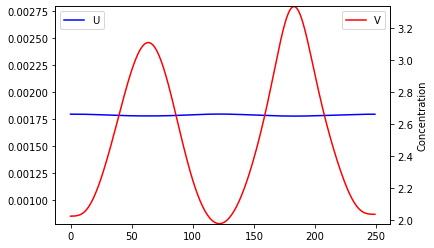

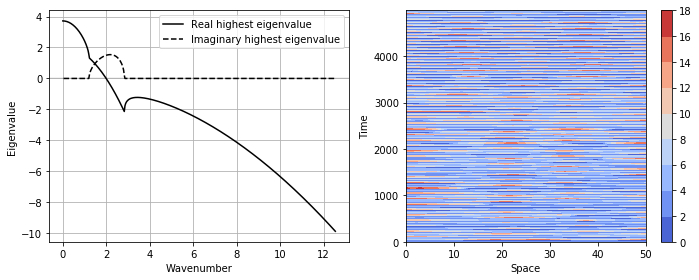

flat: False, converged: False


221


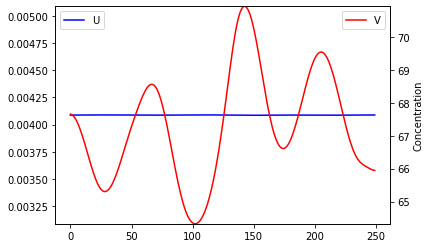

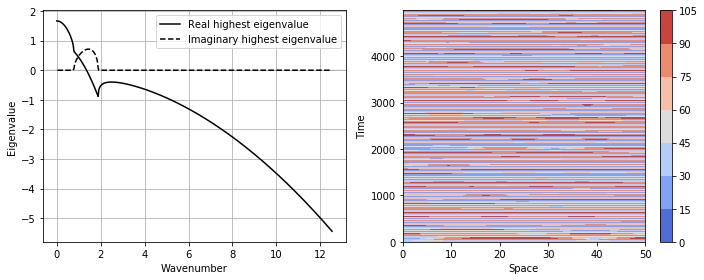

flat: False, converged: False


1753


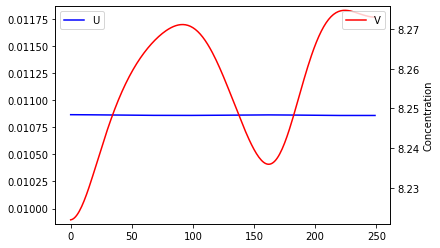

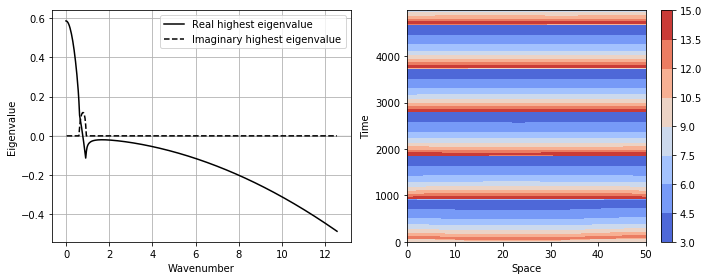

flat: False, converged: False


2445


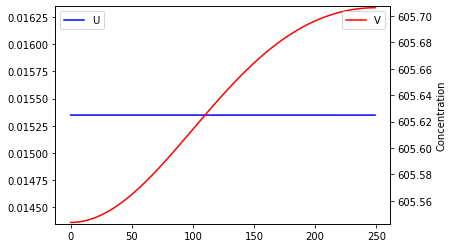

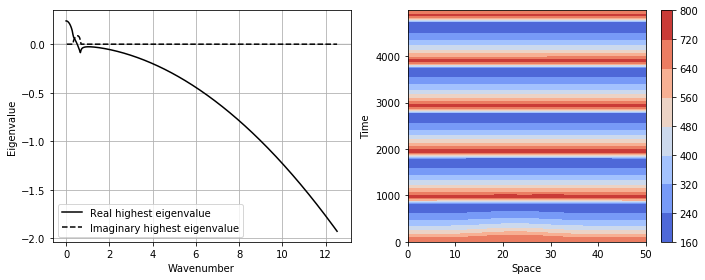

flat: False, converged: False


2529


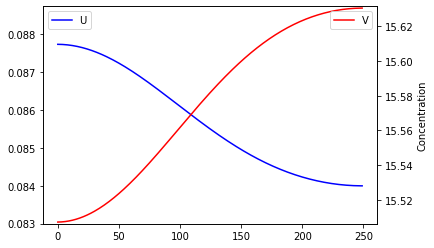

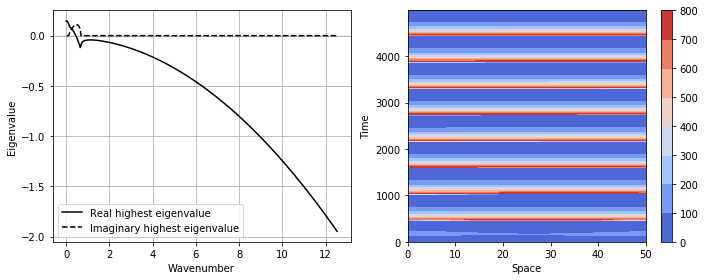

flat: False, converged: False


2806


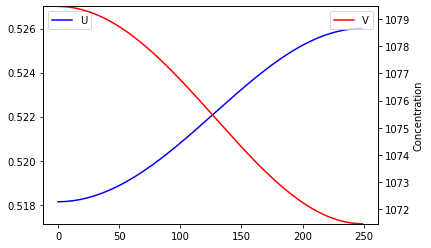

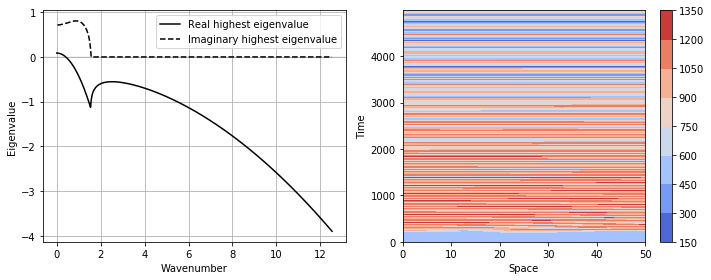

flat: False, converged: False


3217


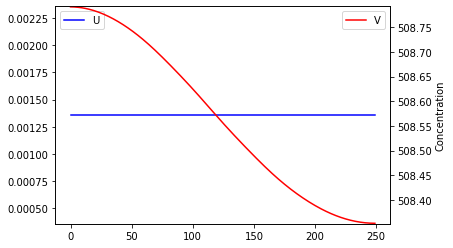

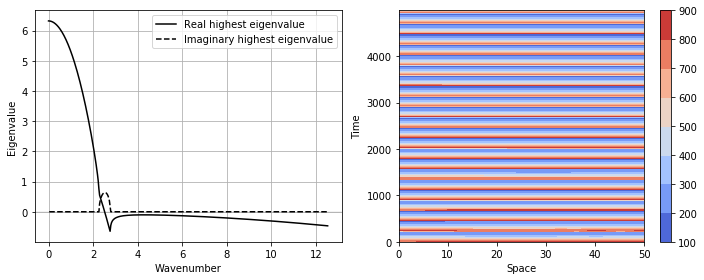

flat: False, converged: False


3276


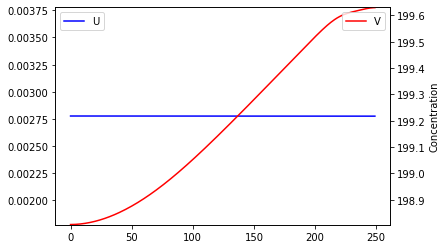

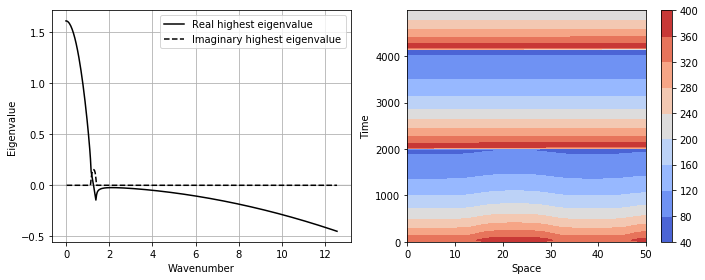

flat: False, converged: False


3442


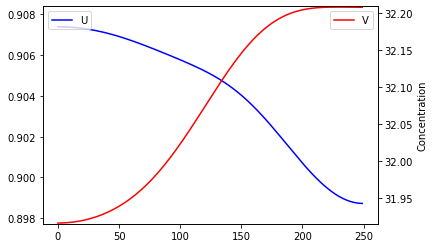

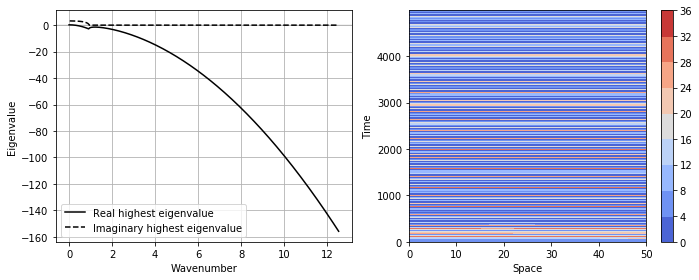

flat: False, converged: False


3838


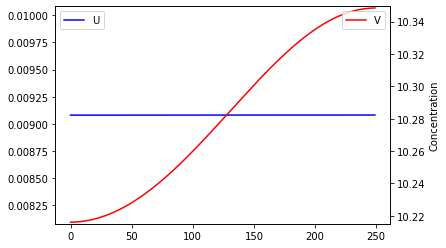

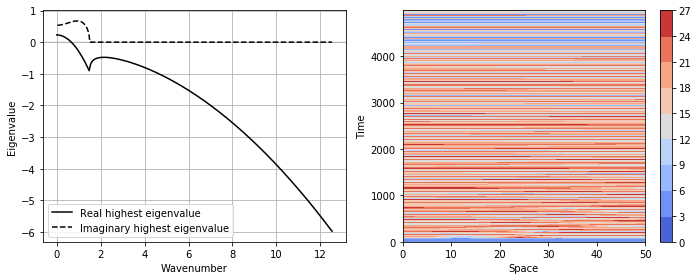

flat: False, converged: False


4073


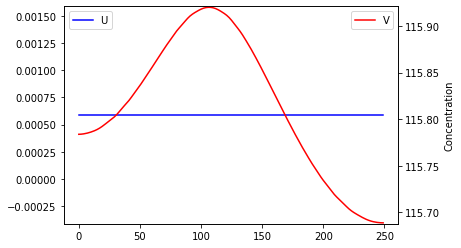

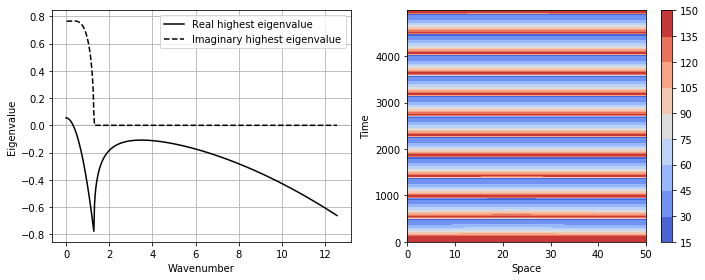

flat: False, converged: False


4162


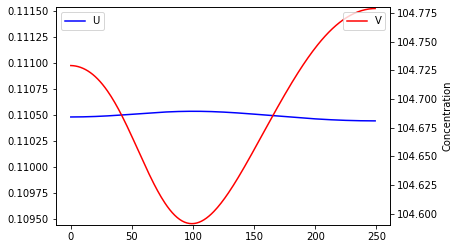

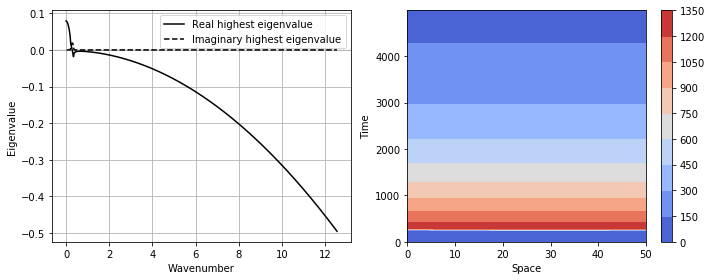

flat: False, converged: False


4228


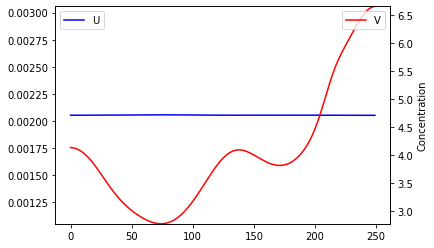

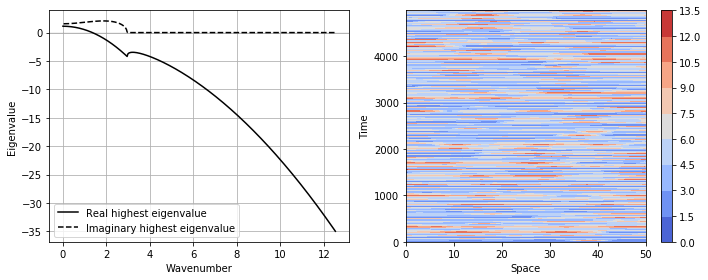

flat: False, converged: False


4575


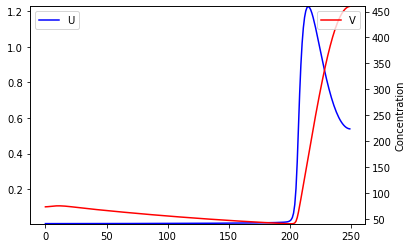

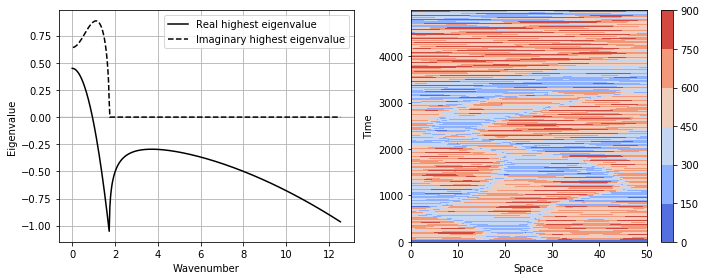

flat: False, converged: False


4789


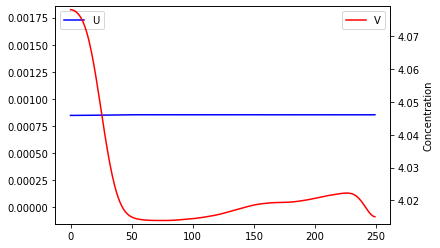

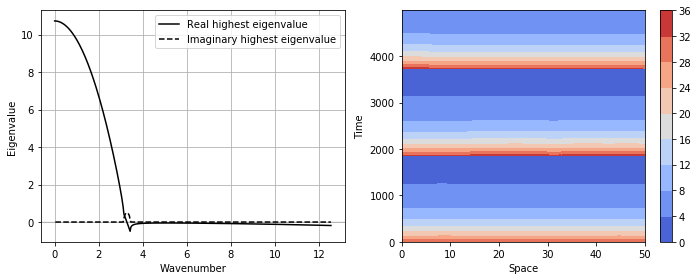

flat: False, converged: False


4816


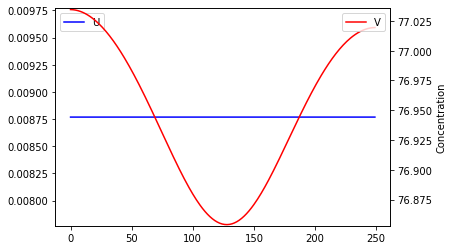

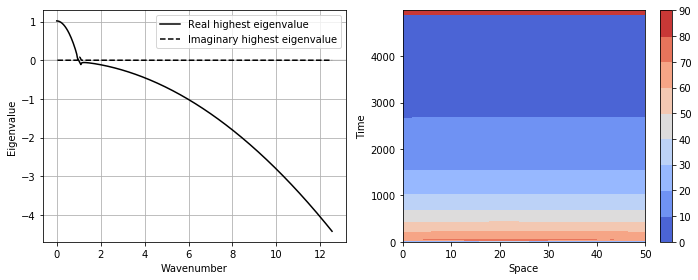

flat: False, converged: False


5058


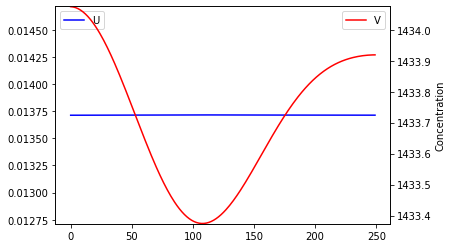

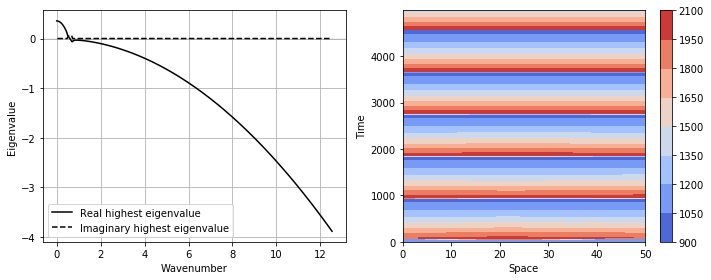

flat: False, converged: False


5213


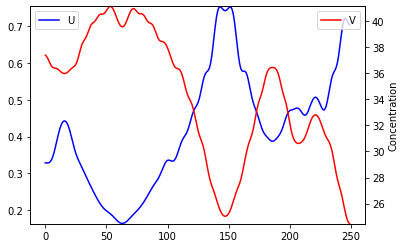

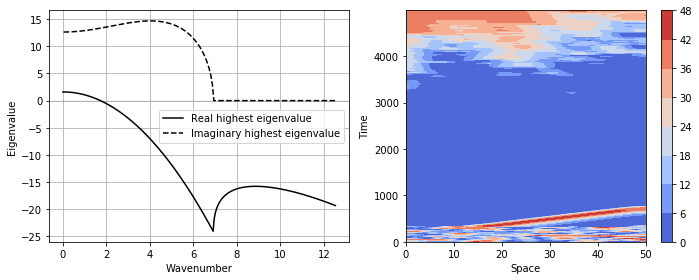

flat: False, converged: False


5387


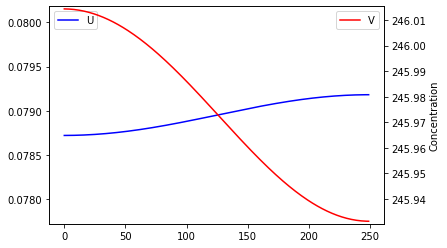

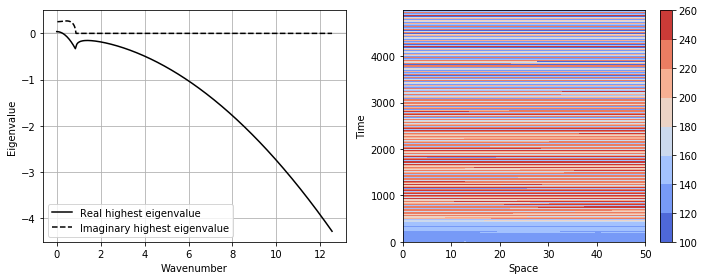

flat: False, converged: False


5577


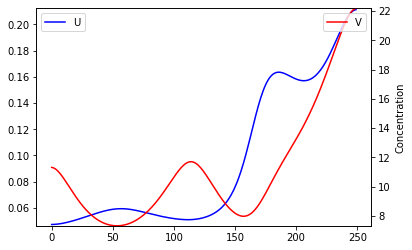

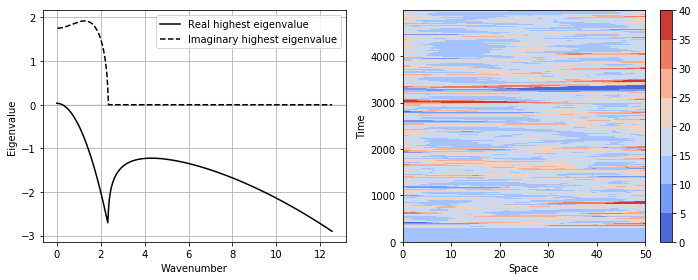

flat: False, converged: False


5877


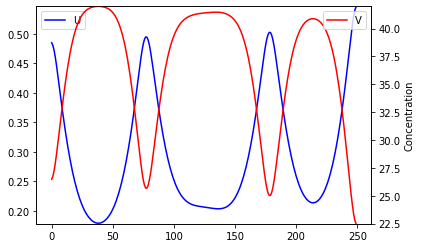

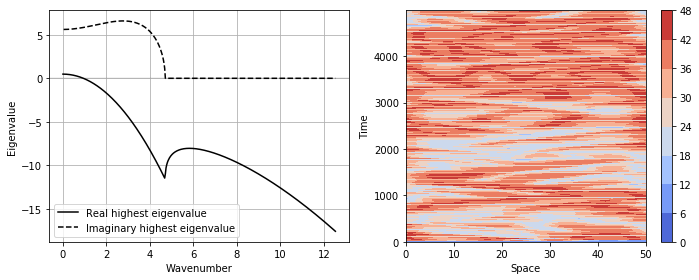

flat: False, converged: False


5976


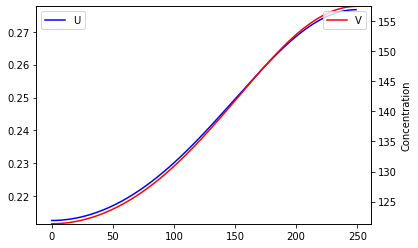

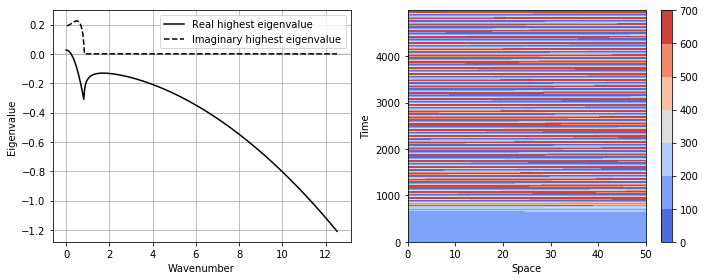

flat: False, converged: False


6292


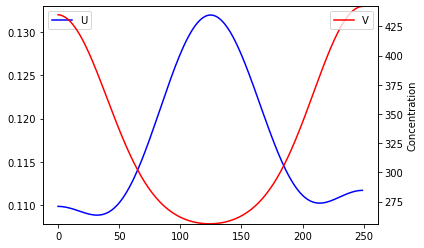

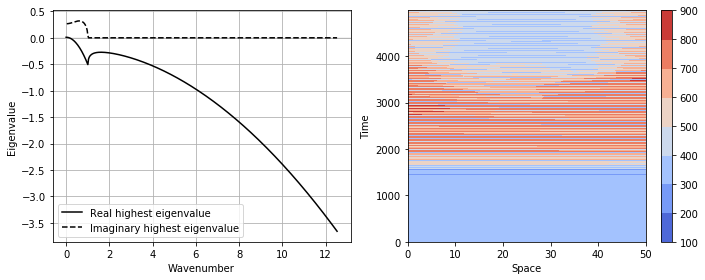

flat: False, converged: False


6762


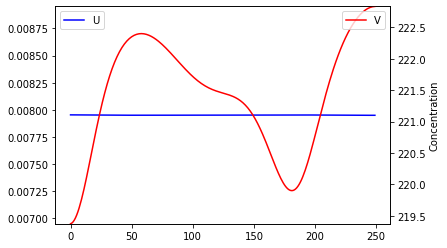

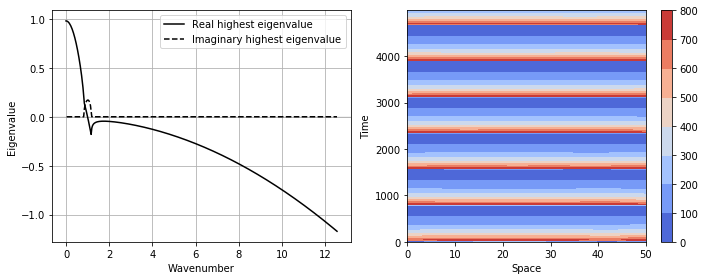

flat: False, converged: False


7051


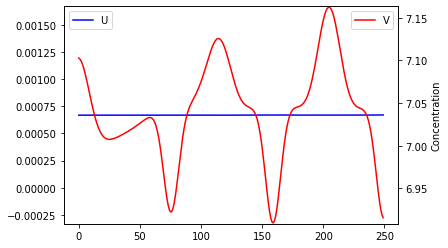

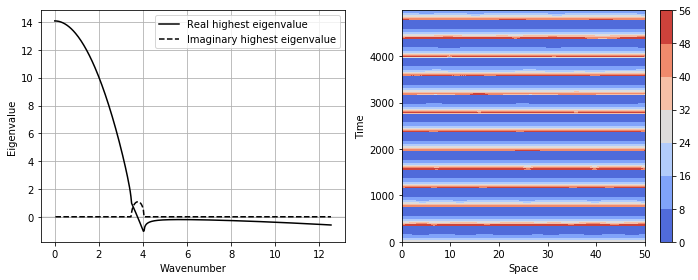

flat: False, converged: False


7186


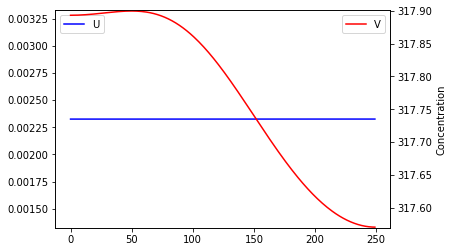

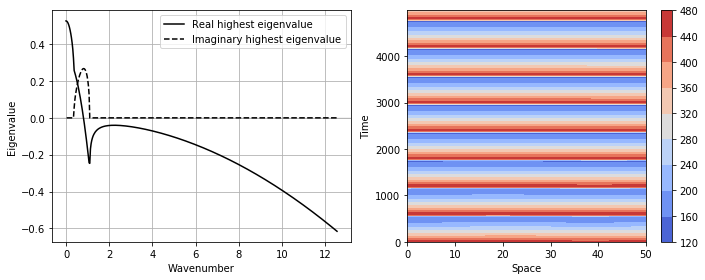

flat: False, converged: False


7304


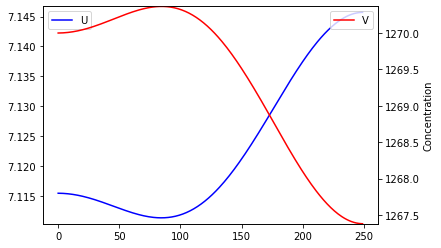

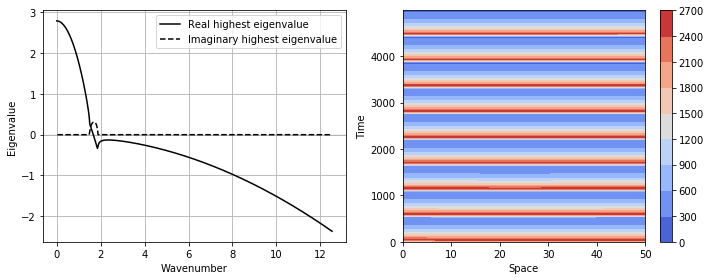

flat: False, converged: False


7322


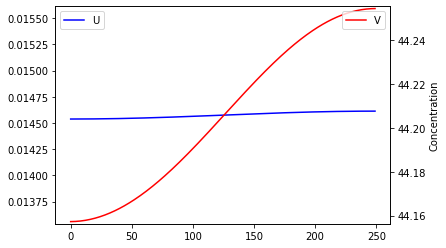

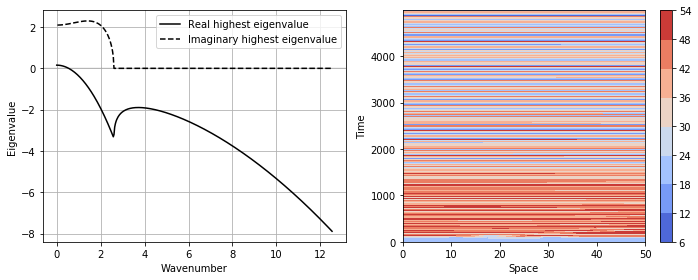

flat: False, converged: False


7632


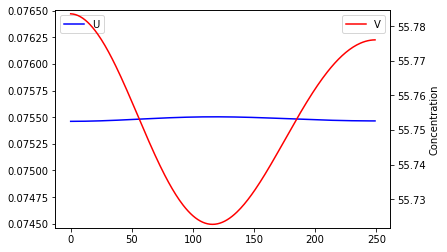

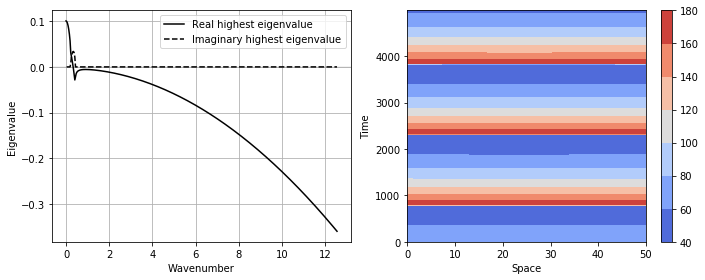

flat: False, converged: False


7952


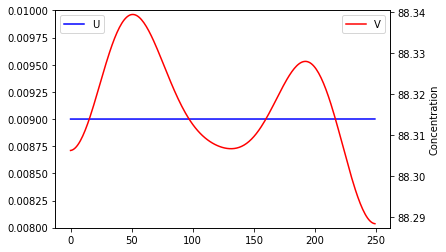

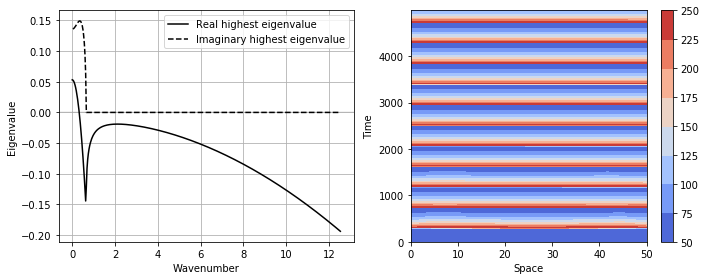

flat: False, converged: False




In [ ]:
for parID in df1.index[:30]:
    if pattern_df.loc[parID]['ss_n']==1:
        print(parID)
        # print(pattern_df.loc[parID])
        # print(pattern_df.loc[parID]['ss_n'])
        #load records 
        U_final = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
        U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))


        parID_display(parID,L,J,T, crop=400)

        #check if flat with diff function
        diffUfinal = np.round(np.diff(U_final),decimals=3)
        if np.all(diffUfinal==0)==True:
            flat=True
        else:
            flat=False

        #check if convergence with diff function
        diffUrecord = np.round(np.diff(U_record[1][-10:], axis=0),decimals=6)
        
        if np.all(diffUrecord==0) ==True:
            converged=True
        else:
            converged=False
        time_vector = [U_record[0][x][10] for x in range(len(U_record[0]))]
        # autocorr(np.array(time_vector))
        print(f'flat: {flat}, converged: {converged}')
        print('\n')


In [ ]:

for parID in parID_list[20:30]:
    print(parID)
    #load records 
    U_final = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
    U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))


    # parID_display(parID,L,J,T, crop=100)

    #check if flat with diff function
    diffUfinal = np.round(np.diff(U_final),decimals=3)
    if np.all(diffUfinal==0)==True:
        flat=True
    else:
        flat=False

    #check if convergence with diff function
    diffUrecord = np.round(np.diff(U_record[1][-10:], axis=0),decimals=3)
    if np.all(diffUrecord==0) ==True:
        converged=True
    else:
        converged=False


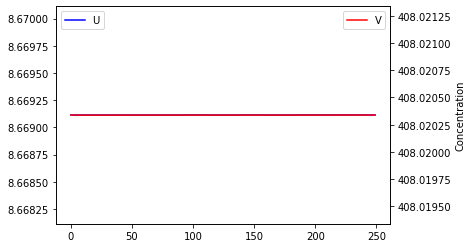

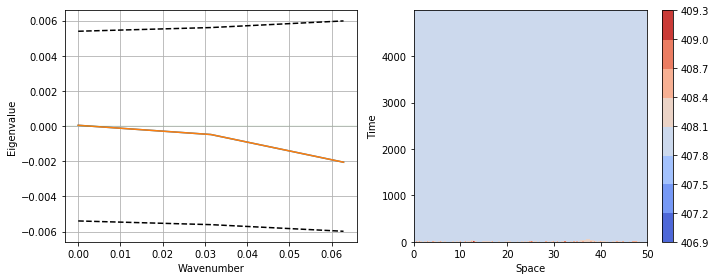

In [ ]:
parID_display(8648,L,J,T, crop=3)

In [ ]:
def autocorr(x):
    n = x.size
    norm = (x - np.mean(x))
    result = np.correlate(norm, norm, mode='same')
    acorr = result[n//2 + 1:] / (x.var() * np.arange(n-1, n//2, -1))
    lag = np.abs(acorr).argmax() + 1
    r = acorr[lag-1]        
    if np.abs(r) > 0.5:
      print('Appears to be autocorrelated with r = {}, lag = {}'. format(r, lag))
    else: 
      print('Appears to be not autocorrelated')
    return r, lag

Appears to be autocorrelated with r = 0.8000327043224239, lag = 197


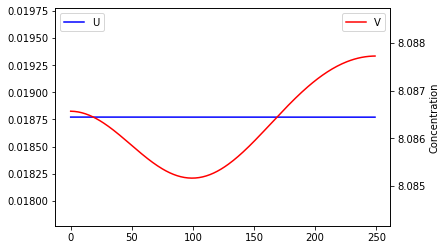

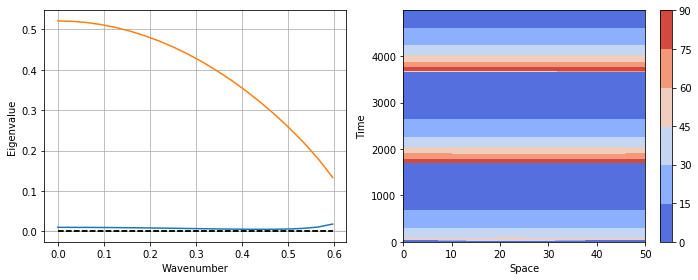

In [ ]:
parID=2932
U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
time_vector = [U_record[0][x][10] for x in range(len(U_record[0]))]
autocorr(np.array(time_vector))
parID_display(parID,L,J,T, crop=20)


Appears to be autocorrelated with r = 0.9899645707686601, lag = 1


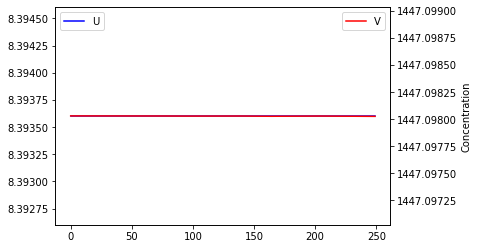

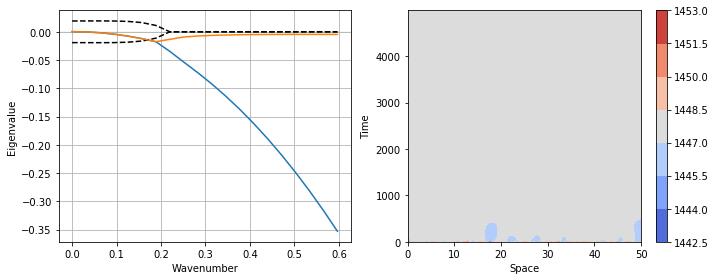

In [ ]:
parID=2886
U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
time_vector = [U_record[0][x][10] for x in range(len(U_record[0]))]
autocorr(np.array(time_vector))
parID_display(parID,L,J,T, crop=20)


Appears to be autocorrelated with r = 0.9285649749467298, lag = 1


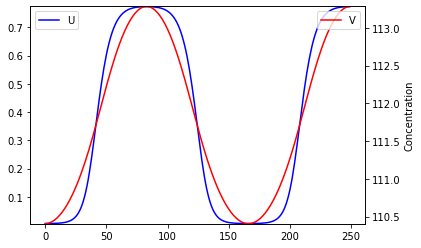

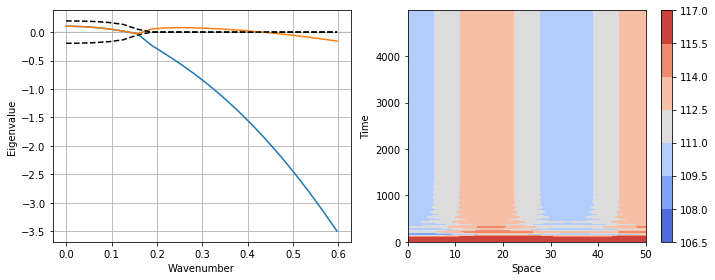

In [ ]:
parID=193560
U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
time_vector = [U_record[0][x][10] for x in range(len(U_record[0]))]
autocorr(np.array(time_vector))
parID_display(parID,L,J,T, crop=20)


12019
1.0


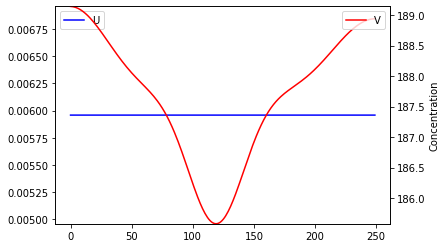

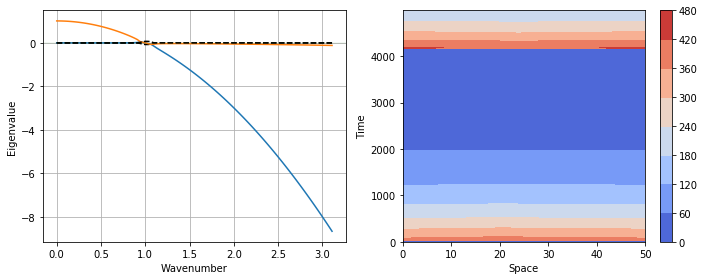

[[-3.031326 -3.031263 -3.031135 ... -3.021888 -3.021939 -3.021964]
 [-3.00096  -3.000896 -3.00077  ... -2.991721 -2.991773 -2.991798]
 [-2.970897 -2.970834 -2.970709 ... -2.961855 -2.961907 -2.961932]
 ...
 [-1.908225 -1.908196 -1.908138 ... -1.9046   -1.904635 -1.904652]
 [-1.88914  -1.889112 -1.889055 ... -1.885585 -1.885619 -1.885636]
 [-1.870247 -1.870219 -1.870163 ... -1.86676  -1.866794 -1.866811]]
Appears to be not autocorrelated
flat: False, converged: False




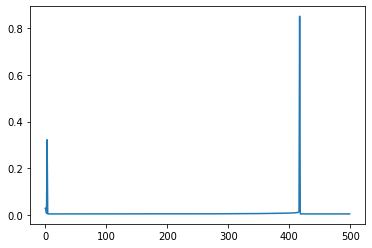

In [ ]:
parID=12019
print(parID)
print(pattern_df.loc[parID]['ss_n'])
#load records 
U_final = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))
U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'rb'))


parID_display(parID,L,J,T, crop=100)

#check if flat with diff function
diffUfinal = np.round(np.diff(U_final),decimals=3)
if np.all(diffUfinal==0)==True:
    flat=True
else:
    flat=False

#check if convergence with diff function
diffUrecord = np.round(np.diff(U_record[1][-50:], axis=0),decimals=6)
print(diffUrecord)
if np.all(diffUrecord==0) ==True:
    converged=True
else:
    converged=False
time_vector = [U_record[0][x][10] for x in range(len(U_record[0]))]
plt.plot(time_vector)
autocorr(np.array(time_vector))
print(f'flat: {flat}, converged: {converged}')
print('\n')